# Projet de Machine Learning

# Jeu de données

Les données proviennent du concours KAGGLE et font partie du jeu de données intitulé "Gym Members Exercise Dataset", accessible ici : [Gym Members Exercise Dataset](https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset).

Ce jeu de données offre un aperçu détaillé des habitudes d'exercice, des caractéristiques physiques et des indicateurs de condition physique des membres d’une salle de sport. Il comprend 15 variables observées chez 973 individus fréquentant une salle de sport :

- **Age** : Âge du membre.
- **Gender** : Sexe du membre (variable qualitative avec deux catégories : homme ou femme).
- **Weight_kg** : Poids en kilogrammes.
- **Height_m** : Taille en mètres.
- **Max_BPM** : Fréquence cardiaque maximale (en battements par minute) atteinte pendant les séances d’entraînement.
- **Avg_BPM** : Fréquence cardiaque moyenne durant les séances d’entraînement.
- **Resting_BPM** : Fréquence cardiaque au repos avant l’entraînement.
- **Session_Duration_hours** : Durée de chaque séance d’entraînement en heures.
- **Calories_Burned** : Nombre total de calories brûlées lors de chaque séance.
- **Workout_Type** : Type d’entraînement pratiqué (variable qualitative avec 4 catégories : cardio, musculation, yoga, HIIT).
- **Fat_Percentage** : Pourcentage de masse grasse du membre.
- **Water_Intake_liters** : Quantité d’eau consommée quotidiennement pendant les séances d’entraînement.
- **Workout_Frequency_days_week** : Nombre de séances d’entraînement hebdomadaires (variable qualitative avec 4 catégories : de 2 à 5 séances).
- **Experience_Level** : Niveau d’expérience (variable qualitative avec 3 niveaux : 1 pour débutant, 3 pour expert).
- **BMI** : Indice de masse corporelle (IMC), calculé à partir du poids et de la taille.

L'objectif de ce projet est d'abord de prédire la variable **Calories_Burned** en fonction des autres variables, puis d'estimer la variable **Experience_Level** en utilisant toutes les autres variables disponibles, y compris **Calories_Burned**.


## 1. Analyse exploratoire des données
L’objectif dans un premier temps est d’explorer les différentes variables, étape préliminaire indispensable à
l’analyse. Ci-dessous sont précisées quelques questions basiques. Vous pouvez compléter l’analyse selon vos
propres idées.
* Commencez par vérifier la nature des différentes variables et leur encodage. N’oubliez pas de convertir
toutes les variables qualitatives.
* Commencez l’exploration par une analyse descriptive unidimensionnelle des données. Des transformations
des variables quantitatives vous semblent-t-elles pertinentes ?
* Poursuivez avec une analyse descriptive bidimensionnelle. Utilisez des techniques de visualisation: par
exemple les nuages de points (scatterplot), des graphes des correlations, des boîtes à moustaches parallèles,
mosaicplot... Quelles variables semblent liées ?
* Réalisez une analyse en composantes principales des variables explicatives quantitatives et interprétez les
résultats. Visualisez les dépendances éventuelles entre les variables à prédire et les variables explicatives.

Cette analyse a été réalisé en R

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt, log
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score


from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import label_binarize

In [5]:
path=""
data=pd.read_csv(path+"gym_members_exercise_tracking.csv",sep=",",header=0)
# Vérification du contenu
data.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [10]:
data.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

In [12]:
data['Gender'] = data['Gender'].astype('category')
data['Workout_Type'] = data['Workout_Type'].astype('category')
data['Workout_Frequency (days/week)'] = data['Workout_Frequency (days/week)'].astype('category')
data['Experience_Level'] = data['Experience_Level'].astype('category')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Age                            973 non-null    int64   
 1   Gender                         973 non-null    category
 2   Weight (kg)                    973 non-null    float64 
 3   Height (m)                     973 non-null    float64 
 4   Max_BPM                        973 non-null    int64   
 5   Avg_BPM                        973 non-null    int64   
 6   Resting_BPM                    973 non-null    int64   
 7   Session_Duration (hours)       973 non-null    float64 
 8   Calories_Burned                973 non-null    float64 
 9   Workout_Type                   973 non-null    category
 10  Fat_Percentage                 973 non-null    float64 
 11  Water_Intake (liters)          973 non-null    float64 
 12  Workout_Frequency (days/week)  973 n

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [14]:
data.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,49.840000


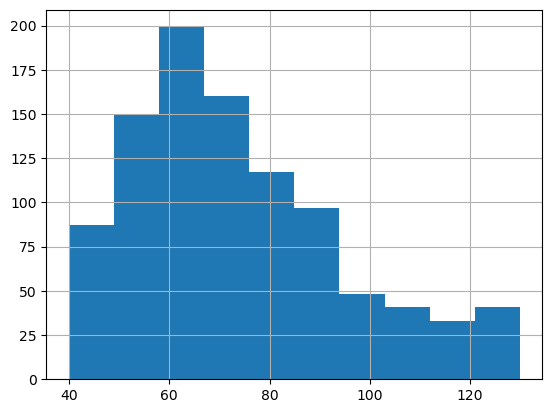

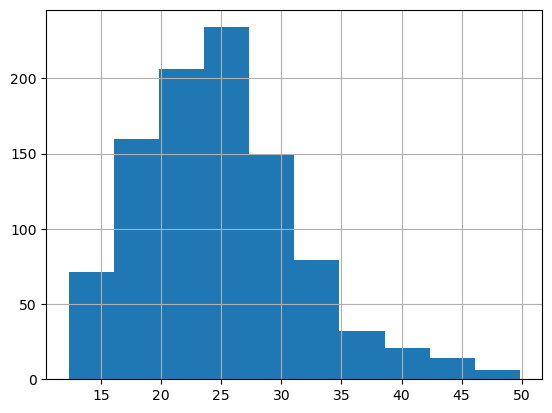

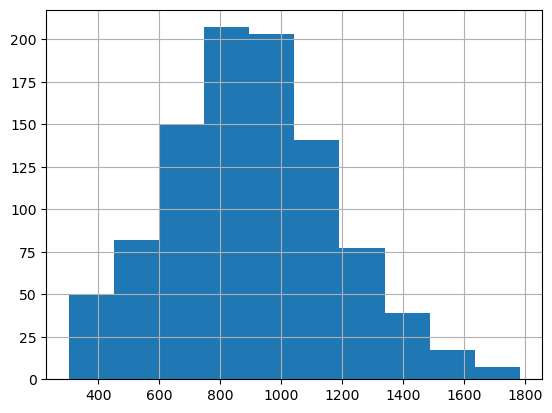

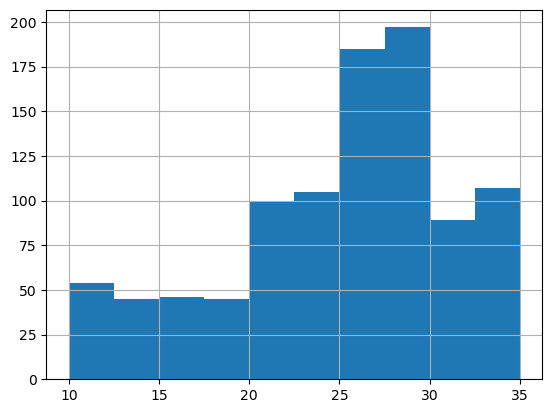

In [16]:
data["Weight (kg)"].hist()
plt.show()
data["BMI"].hist()
plt.show()
data["Calories_Burned"].hist()
plt.show()
data["Fat_Percentage"].hist()
plt.show()

In [17]:
data["Weight (kg)"]=data["Weight (kg)"].map(lambda x: log(x))
data["BMI"]=data["BMI"].map(lambda x: log(x))
data["Calories_Burned"]=data["Calories_Burned"].map(lambda x: sqrt(x))
data["Fat_Percentage"]=data["Fat_Percentage"].map(lambda x: x**2)

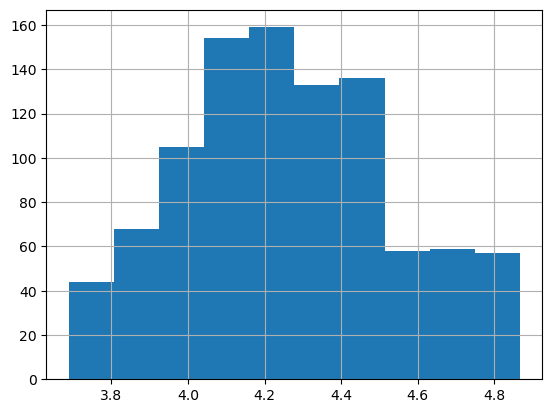

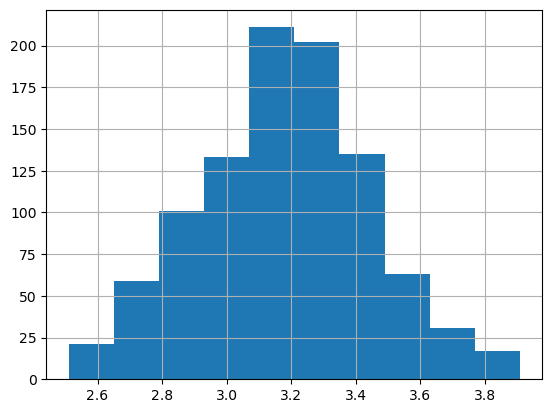

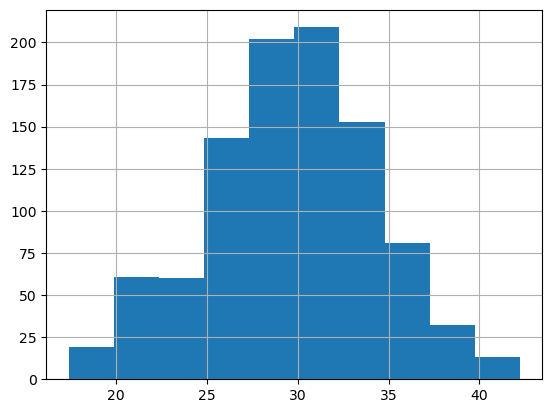

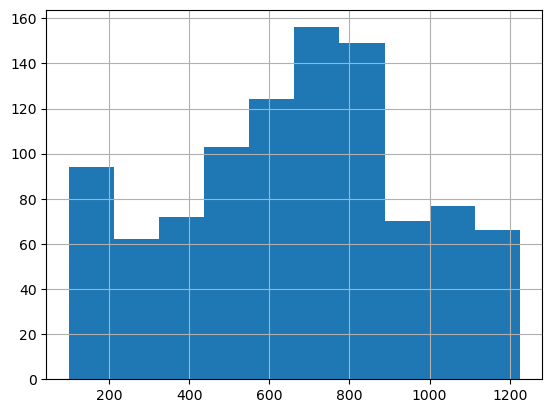

In [18]:
data["Weight (kg)"].hist()
plt.show()
data["BMI"].hist()
plt.show()
data["Calories_Burned"].hist()
plt.show()
data["Fat_Percentage"].hist()
plt.show()

In [22]:
dataDum=pd.get_dummies(data[["Gender","Workout_Type","Workout_Frequency (days/week)","Experience_Level"]])
dataQuant=data[["Age","Weight (kg)","Height (m)","Max_BPM","Avg_BPM","Resting_BPM","Session_Duration (hours)","Calories_Burned","Fat_Percentage","Water_Intake (liters)","BMI"]]
dfR=pd.concat([dataDum,dataQuant],axis=1)
dfR.head()

,Gender_Female,Gender_Male,Workout_Type_Cardio,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga,Workout_Frequency (days/week)_2,Workout_Frequency (days/week)_3,Workout_Frequency (days/week)_4,Workout_Frequency (days/week)_5,...,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),BMI
0,False,True,False,False,False,True,False,False,True,False,...,4.480740,1.71,180,157,60,1.69,36.235342,158.76,3.5,3.407842
1,True,False,False,True,False,False,False,False,True,False,...,4.316154,1.53,179,151,66,1.30,29.715316,1149.21,2.1,3.465736
2,True,False,True,False,False,False,False,False,True,False,...,4.220977,1.66,167,122,54,1.11,26.019224,1115.56,2.3,3.207208
3,False,True,False,False,True,False,False,True,False,False,...,3.974058,1.70,190,164,56,0.59,23.065125,829.44,2.1,2.912894
4,False,True,False,False,True,False,False,True,False,False,...,3.830813,1.79,188,158,68,0.64,23.579652,852.64,2.8,2.666534


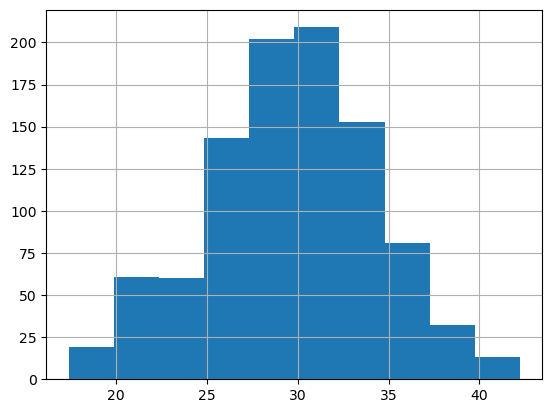

In [24]:
Yc=data["Calories_Burned"]
Yc.hist()
plt.show()

# Régression linéaire

In [90]:
from sklearn.model_selection import train_test_split, KFold
X_train,X_test,Yc_train,Yc_test=train_test_split(dfR,Yc,test_size=0.2,random_state=11)

In [92]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)  
Xc_train = scaler.transform(X_train)  
Xc_test = scaler.transform(X_test)

**régression avec choix de modèle par régularisation avec une pénalisation lasso**

In [95]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
regLasso = linear_model.Lasso()
regLasso.fit(Xc_train,Yc_train)
prev=regLasso.predict(Xc_test)
print("MSE=",mean_squared_error(Yc_test,prev))

MSE= 3.721532549873233


In [97]:
from sklearn.metrics import r2_score
print("R2=",r2_score(Yc_test,prev))

R2= 0.8492710764523865


**Optimisation du paramètre de pénalisation Lasso par validation croisée**

In [100]:
from sklearn.model_selection import GridSearchCV
# grille de valeurs du paramètre alpha à optimiser
param=[{"alpha":[0.01,0.02,0.05,0.1,0.2,0.3,0.4,0.5,1]}]
#kf = KFold(n_splits = 10, shuffle = True, random_state = 11)
#On peut remplacer cv=5 par cv=kf
regLasso = GridSearchCV(linear_model.Lasso(), param,cv=5,n_jobs=-1)
regLassOpt=regLasso.fit(Xc_train, Yc_train)
# paramètre optimal
regLassOpt.best_params_["alpha"]
print("Meilleur R2 = %f, Meilleur paramètre = %s" % (regLassOpt.best_score_,regLassOpt.best_params_))

Meilleur R2 = 0.983826, Meilleur paramètre = {'alpha': 0.01}


**Tracé des résidus**

In [103]:
prev=regLassOpt.predict(Xc_test)
print("MSE=",mean_squared_error(prev,Yc_test))
print("R2=",r2_score(Yc_test,prev))

MSE= 0.3084165442823375
R2= 0.9875085618354903


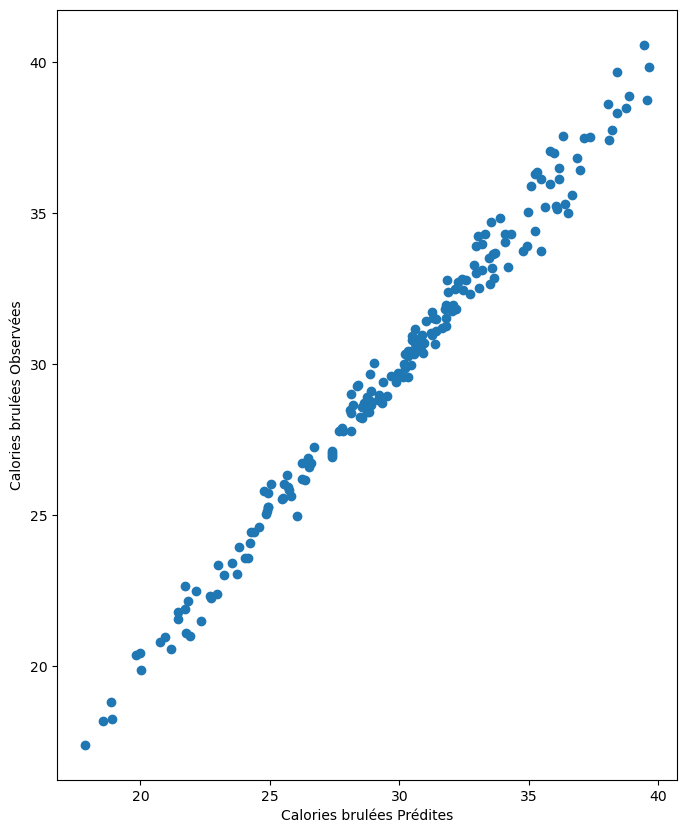

In [105]:
plt.plot(prev,Yc_test,"o")
plt.xlabel("Calories brulées Prédites")
plt.ylabel("Calories brulées Observées")
plt.show()

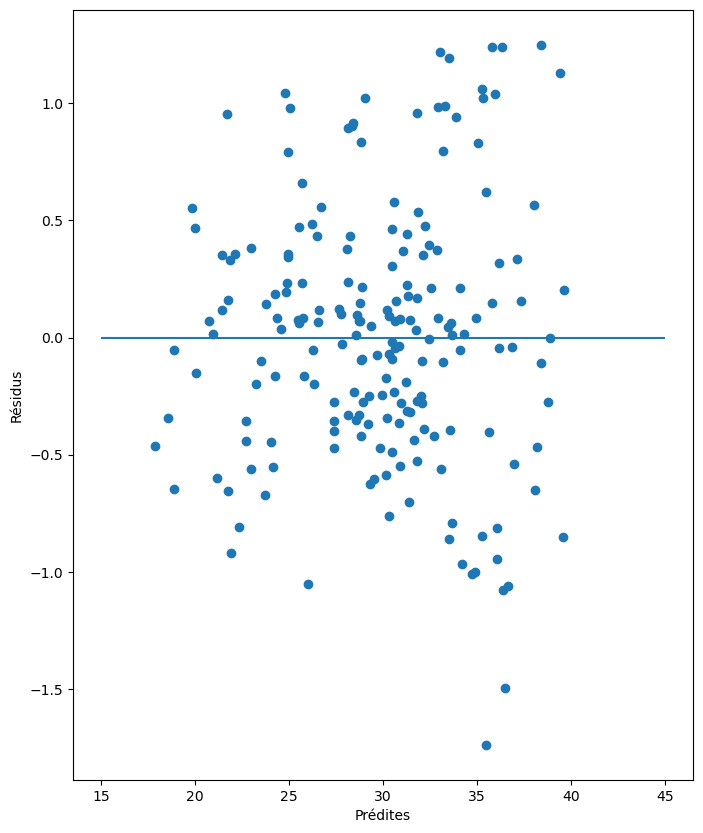

In [107]:
plt.plot(prev,Yc_test-prev,"o")
plt.xlabel("Prédites")
plt.ylabel("Résidus")
plt.hlines(0,15,45)
plt.show()

In [109]:
regLasso=linear_model.Lasso(alpha=regLassOpt.best_params_['alpha'])
model_lasso=regLasso.fit(Xc_train,Yc_train)
model_lasso.coef_

array([-6.81521834e-01,  2.55265674e-15,  5.97896122e-03,  1.47981181e-04,
       -0.00000000e+00, -4.83762756e-02, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  9.50240862e-02,
       -2.76907189e-01, -6.42472760e-01,  2.84130975e-02,  1.04480371e-02,
        0.00000000e+00,  1.46500680e+00,  7.82107517e-03,  4.32104500e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

In [111]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
print("Lasso conserve " + str(sum(coef != 0)) + 
      " variables et en supprime " +  str(sum(coef == 0)))

Lasso conserve 13 variables et en supprime 10


Text(0.5, 1.0, 'Coefficients du modèle lasso')

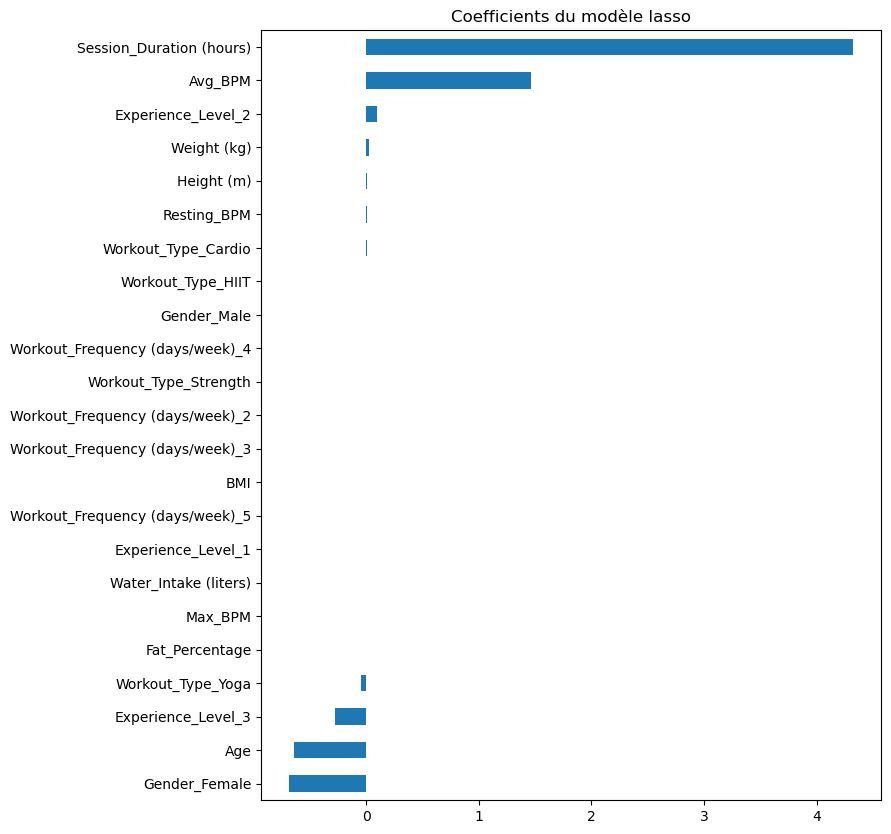

In [113]:
imp_coef = coef.sort_values()
#imp_coef = imp_coef.iloc[:-1]
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title(u"Coefficients du modèle lasso")

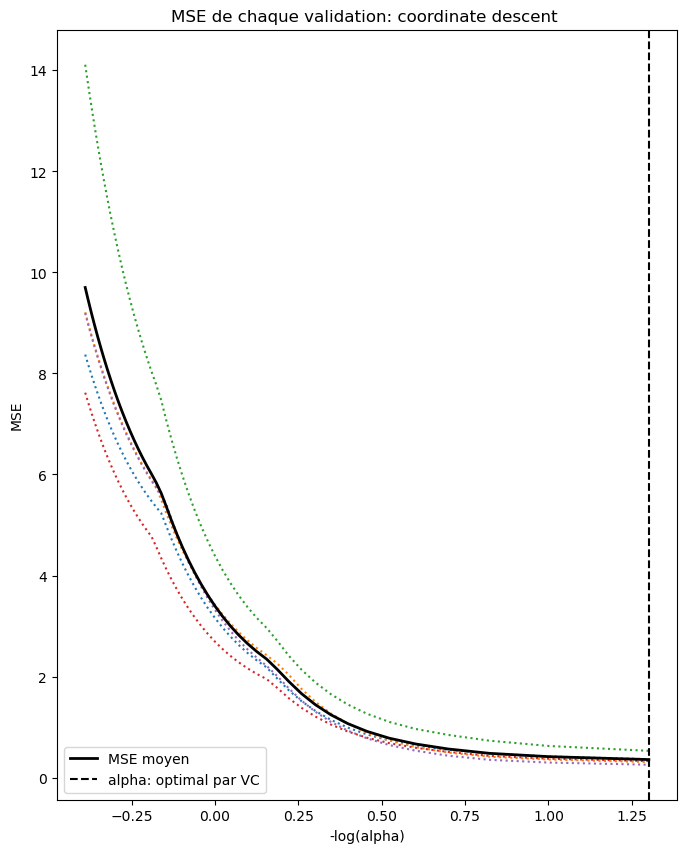

In [115]:
from sklearn.linear_model import LassoCV, LassoLarsCV
model = LassoCV(cv=5, alphas=np.array(range(1,50,1))/20.,n_jobs=-1,random_state=13).fit(Xc_train,Yc_train)
m_log_alphas = -np.log10(model.alphas_)

plt.figure()

plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='MSE moyen', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha: optimal par VC')

plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('MSE')
plt.title('MSE de chaque validation: coordinate descent ')
plt.show()

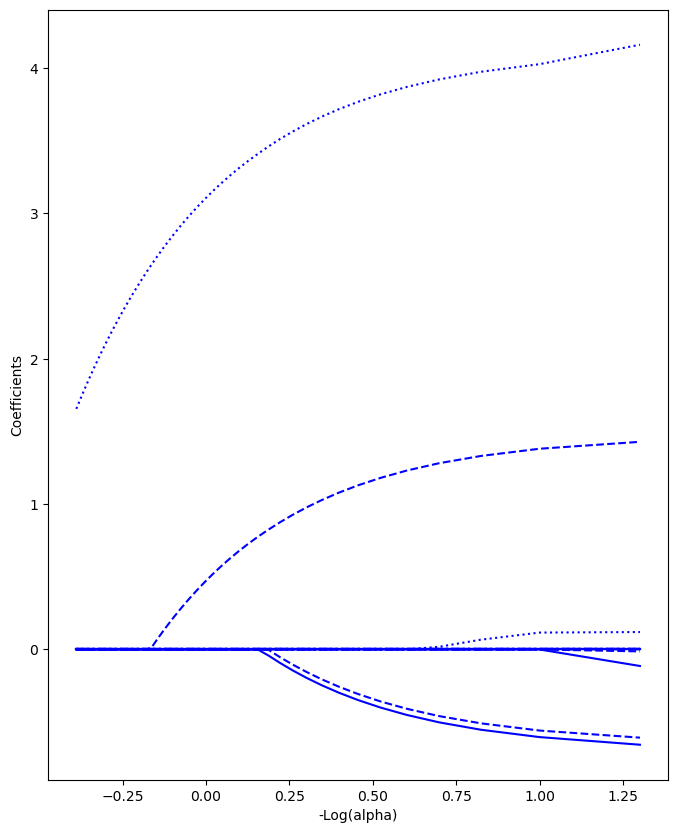

In [117]:
from itertools import cycle

from sklearn.linear_model import lasso_path
alphas_lasso, coefs_lasso, _ = lasso_path(Xc_train,Yc_train, alphas=np.array(range(1,50,1))/20.,)


plt.figure()
ax = plt.gca()

styles = cycle(['-', '--', '-.', ':'])

neg_log_alphas_lasso = -np.log10(alphas_lasso)
for coef_l, s in zip(coefs_lasso, styles):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, linestyle=s,c='b')
plt.xlabel('-Log(alpha)')
plt.ylabel('Coefficients')
plt.show()

**On passe à Ridge**

In [120]:
regRidge = linear_model.Ridge()
regRidge.fit(Xc_train,Yc_train)
prev=regRidge.predict(Xc_test)
print("MSE=",mean_squared_error(Yc_test,prev))
print("R2=",r2_score(Yc_test,prev))

MSE= 0.30852194245768655
R2= 0.9875042930152391


In [122]:
param = [{"alpha": [0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}]
regRidge = GridSearchCV(linear_model.Ridge(), param, cv=5, n_jobs=-1)
regRidgeOpt = regRidge.fit(Xc_train, Yc_train)
print("Meilleur R2 = %f, Meilleur paramètre = %s" % (regRidgeOpt.best_score_, regRidgeOpt.best_params_))

Meilleur R2 = 0.983606, Meilleur paramètre = {'alpha': 0.7}


In [124]:
prev=regRidgeOpt.predict(Xc_test)
print("MSE=",mean_squared_error(prev,Yc_test))
print("R2=",r2_score(Yc_test,prev))

MSE= 0.3085643209284715
R2= 0.9875025766091088


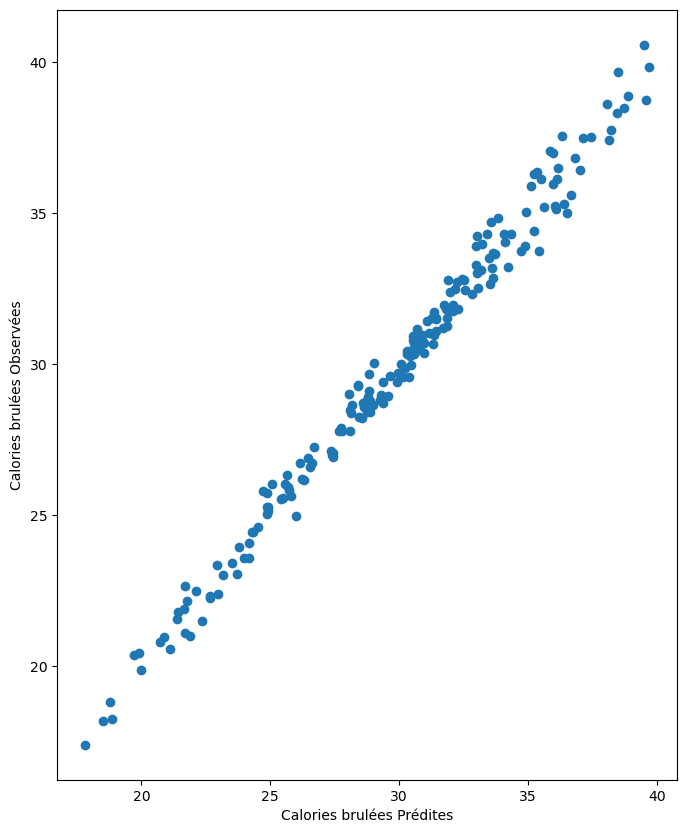

In [126]:
plt.plot(prev,Yc_test,"o")
plt.xlabel("Calories brulées Prédites")
plt.ylabel("Calories brulées Observées")
plt.show()

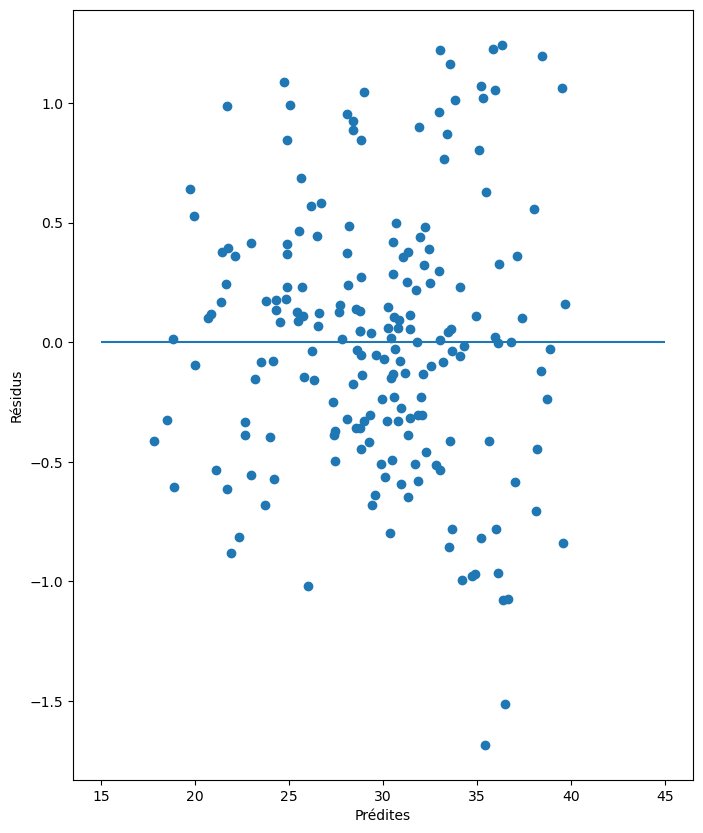

In [128]:
plt.plot(prev,Yc_test-prev,"o")
plt.xlabel("Prédites")
plt.ylabel("Résidus")
plt.hlines(0,15,45)
plt.show()

In [130]:
regRidge=linear_model.Ridge(alpha=regLassOpt.best_params_['alpha'])
model_ridge=regRidge.fit(Xc_train,Yc_train)
model_ridge.coef_

array([-3.38515118e-01,  3.38515118e-01,  2.41018685e-02,  1.83951487e-02,
        1.36464922e-03, -4.47384717e-02, -1.29702781e-02, -1.39312411e-02,
        1.19079593e-02,  2.13524174e-02,  8.12974857e-02,  1.56050124e-01,
       -2.95674404e-01, -6.52762332e-01,  2.04825956e-01, -7.24912689e-02,
        6.04079127e-04,  1.47389905e+00,  2.00478400e-02,  4.36270597e+00,
       -1.08548414e-02,  7.68461866e-03, -1.62668065e-01])

Text(0.5, 1.0, 'Coefficients du modèle ridge')

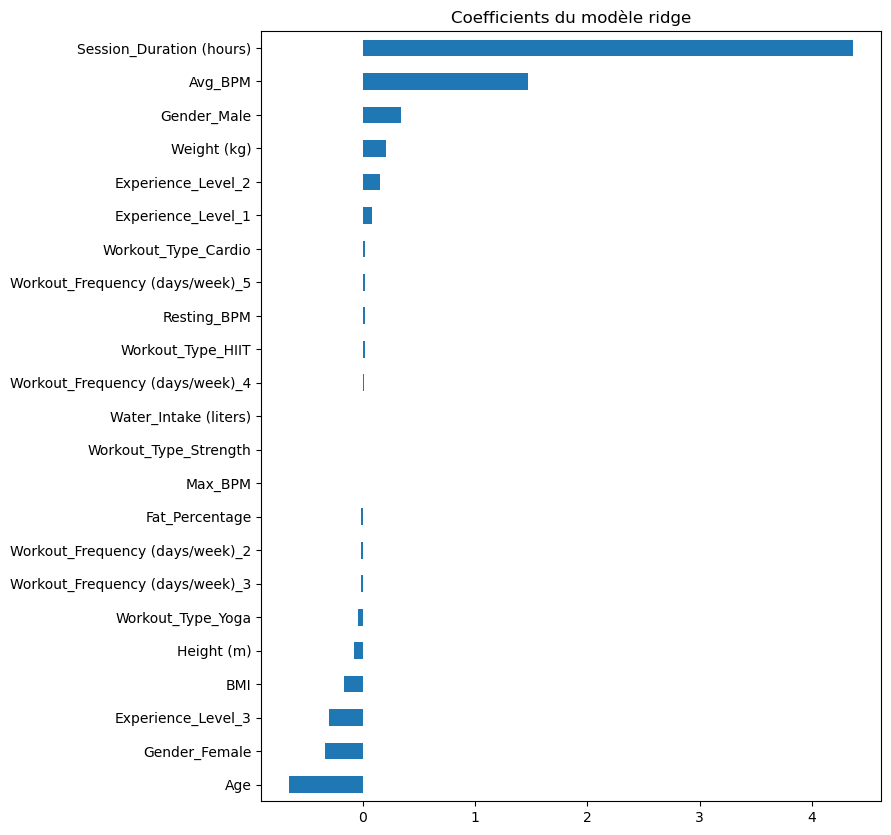

In [132]:
coef = pd.Series(model_ridge.coef_, index = X_train.columns)
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title(u"Coefficients du modèle ridge")

( Tracer "for each regularization method, the choice of the parameter λ is
determinant for the model selection. We see in next Figure the
Regularisation path, showing the profiles of the estimated
parameters when the tuning parameter λ increases.")

C:\Users\anter\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
C:\Users\anter\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:102: FutureWarning: Attribute `cv_values_` is deprecated in version 1.5 and will be removed in 1.7. Use `cv_results_` instead.
  warnings.warn(msg, category=FutureWarning)


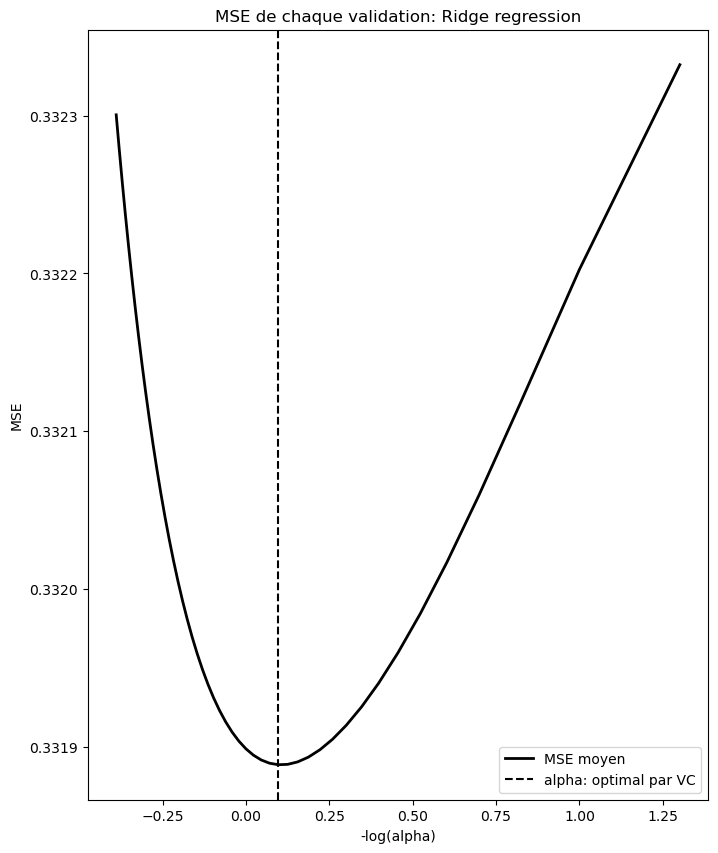

In [135]:
from sklearn.linear_model import RidgeCV

# Définition des valeurs de alpha à tester
alphas = np.array(range(1, 50, 1)) / 20.

# Modèle Ridge avec validation croisée
model = RidgeCV(alphas=alphas, store_cv_values=True).fit(Xc_train, Yc_train)

# Transformation de alpha en échelle logarithmique
m_log_alphas = -np.log10(alphas)

plt.figure()

# Tracé des erreurs de validation croisée
plt.plot(m_log_alphas, model.cv_values_.mean(axis=0), 'k', label='MSE moyen', linewidth=2)

# Ajout de la ligne correspondant au meilleur alpha trouvé
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k', label='alpha: optimal par VC')

plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('MSE')
plt.title('MSE de chaque validation: Ridge regression')
plt.show()

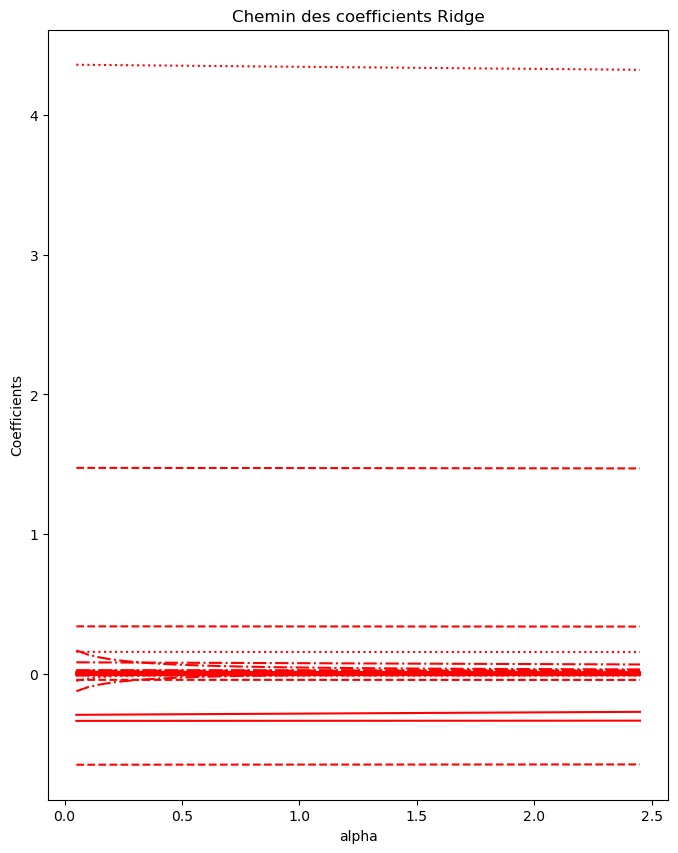

In [137]:
from itertools import cycle
from sklearn.linear_model import Ridge

# Définition des valeurs de alpha à tester
alphas_ridge = np.array(range(1, 50, 1)) / 20.

# Stocker les coefficients pour chaque alpha
coefs_ridge = []

# Boucle sur chaque valeur de alpha
for alpha in alphas_ridge:
    ridge = Ridge(alpha=alpha)
    ridge.fit(Xc_train, Yc_train)
    coefs_ridge.append(ridge.coef_)

# Convertir en array pour faciliter l'affichage
coefs_ridge = np.array(coefs_ridge).T

# Tracé des coefficients en fonction de -log(alpha)
plt.figure()
ax = plt.gca()
styles = cycle(['-', '--', '-.', ':'])


for coef_r, s in zip(coefs_ridge, styles):
    plt.plot(alphas_ridge, coef_r, linestyle=s, c='r')

plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.title('Chemin des coefficients Ridge')
plt.show()

# SVM/SVR

In [140]:
from sklearn.svm import SVR

param = [{"C": [0.4, 0.5, 0.6, 0.8, 1, 1.4]}]
svm = GridSearchCV(SVR(), param, cv=10, n_jobs=-1)
svmOpt = svm.fit(Xc_train, Yc_train) 

print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - svmOpt.best_score_, svmOpt.best_params_))


Meilleur score = 0.039714, Meilleur paramètre = {'C': 1.4}


In [142]:
Y_pred = svmOpt.predict(Xc_test)
mse = mean_squared_error(Yc_test, Y_pred)
print("MSE =", mse)

MSE = 0.6450572375708507


C:\Users\anter\AppData\Local\Temp\ipykernel_13680\3264346780.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


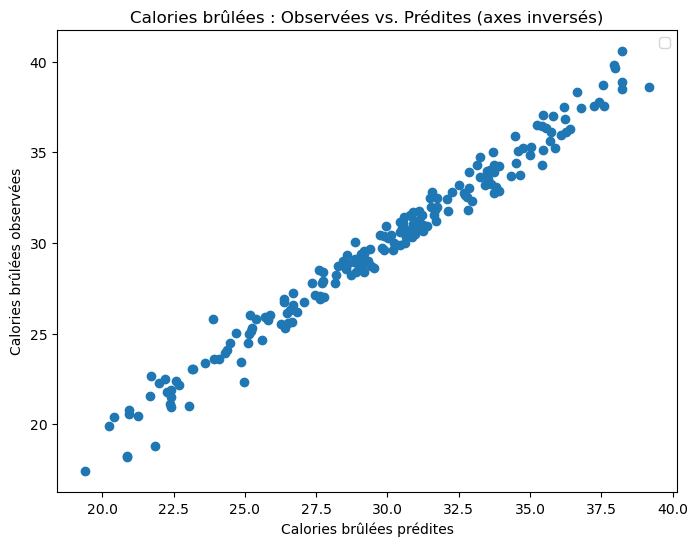

In [144]:
# Tracé des calories prédites vs. calories observées (axes inversés)
plt.figure(figsize=(8,6))
plt.scatter(Y_pred, Yc_test)

# Ajout des labels et titre
plt.xlabel("Calories brûlées prédites")
plt.ylabel("Calories brûlées observées")
plt.title("Calories brûlées : Observées vs. Prédites (axes inversés)")
plt.legend()
plt.show()


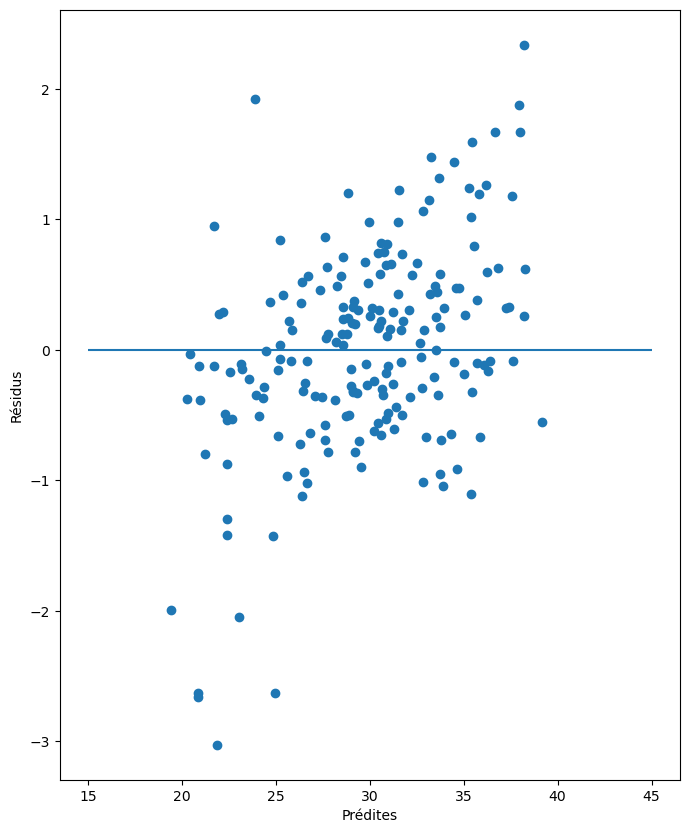

In [146]:
plt.plot(Y_pred,Yc_test-Y_pred,"o")
plt.xlabel("Prédites")
plt.ylabel("Résidus")
plt.hlines(0,15,45)
plt.show()

# Classification

In [26]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV

Nous divisons le jeu de données en un échantillon d’apprentissage (80%) et un échantillon test (20%) afin de pouvoir évaluer objectivement la performance des algorithmes sur des données jamais vues pendant l'entraînement. Cette séparation est indispensable pour éviter l’overfitting, c’est-à-dire le cas où un modèle mémorise les données d'entraînement sans généraliser. L’échantillon test permet donc d’obtenir une estimation réaliste de la capacité de généralisation du modèle sur de nouvelles données.

In [215]:
# Cible à expliquer : Experience_Level (multiclasse 0/1/2)
le = LabelEncoder()
dfC = data.copy()
y = le.fit_transform(dfC['Experience_Level'])

# Préparation des variables explicatives
X = dfC.drop('Experience_Level', axis=1)

# Encodage manuel des variables qualitatives
X = pd.get_dummies(X, columns=['Gender', 'Workout_Type', 'Workout_Frequency (days/week)'], drop_first=True)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardisation des variables (important pour certains modèles)
scaler = StandardScaler()
scaler.fit(X_train)  
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)



## Regression logistique

Sans pénalisation:

In [219]:
logit = LogisticRegression(penalty=None, solver="lbfgs", multi_class='ovr', max_iter=1000)

# Entraînement sur l'échantillon d'entraînement
logitOpt = logit.fit(X_train_scaled, y_train)

# Évaluation sur le test
print("Précision test :", logitOpt.score(X_test_scaled, y_test))
print("Erreur test :", 1 - logitOpt.score(X_test_scaled, y_test))

Précision test : 0.8666666666666667
Erreur test : 0.1333333333333333


C:\Users\anter\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [221]:
# Prédictions sur le test
y_pred = logitOpt.predict(X_test_scaled)

# Matrice de confusion
table = pd.crosstab(y_pred, y_test, rownames=['Prédit'], colnames=['Réel'])
print("Matrice de confusion :")
print(table)

Matrice de confusion :
Réel     0   1   2
Prédit            
0       63  14   0
1       12  68   0
2        0   0  38


Le modèle distingue parfaitement la classe 2 (experts), avec aucune erreur. Il fait quelques confusions entre les classes 0 (débutants) et 1 (intermédiaires), mais conserve une bonne séparation globale. Les erreurs concernent uniquement les débutants et intermédiaires, ce qui suggère que ces deux classes sont plus proches dans l’espace des variables que la classe des experts.

In [224]:
# Coefficients pour chaque classe
logitCoef = logitOpt.coef_

for i, coef in enumerate(logitCoef):
    print(f"Coefficients pour la classe {i} :")
    print(coef)

# Associer les coefficients aux noms de variables
feature_names = X.columns  # après get_dummies()
for i, coef in enumerate(logitCoef):
    print(f"\nClasse {i} :")
    for name, val in zip(feature_names, coef):
        if val != 0:
            print(f"  {name:30s} -> {val:+.3f}")


Coefficients pour la classe 0 :
[-1.73523849e-01 -1.08166567e-01  4.72591445e-01 -1.19273483e-02
  4.77524416e-01  2.89003860e-02  1.55910282e-01 -1.76617794e+00
  1.40612804e-01  5.70530485e-02  2.11625185e-01 -1.66687797e-01
  9.26629085e-03 -1.06351288e-01 -1.78462158e-01 -1.00007313e+01
 -1.91919027e+01 -1.15154637e+01]
Coefficients pour la classe 1 :
[ 8.81496257e-01 -1.79908969e-01 -2.77462757e-01 -5.24458341e-02
 -1.75543327e+00 -1.60442176e-01 -5.26454414e+00  6.02110772e+00
  1.37999152e+00 -6.91436087e-01  7.62647260e-04  4.65759538e-01
  1.29820694e-01  7.07058184e-02  1.87285821e-01  9.61348446e+00
  1.04281706e+01 -1.75182056e+00]
Coefficients pour la classe 2 :
[ 0.30895951  0.19940617  0.34265972  0.59929298 -0.73013477  0.06941533
  4.63759991  1.35383092 -8.31226879  1.55877728  0.02877848 -4.07003792
  0.10936746  0.38758181  0.20478194 -0.23533603  0.88439329  3.52375249]

Classe 0 :
  Age                            -> -0.174
  Weight (kg)                    -> -0.10

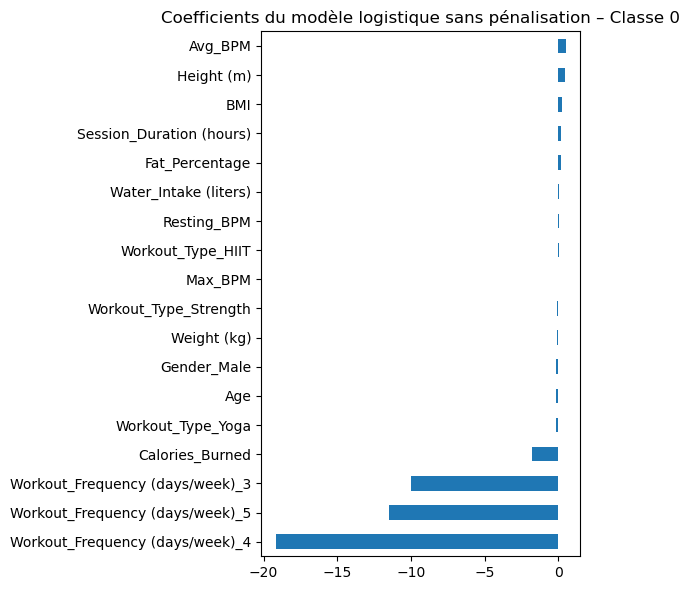

In [226]:
classe = 0  
coef = pd.Series(logitCoef[classe], index=X.columns)
imp_coef = coef.sort_values()

plt.figure(figsize=(6, 6))
imp_coef.plot(kind="barh")
plt.title(f"Coefficients du modèle logistique sans pénalisation – Classe {classe}")
plt.tight_layout()
plt.show()


Les individus ayant une faible fréquence d’entraînement (Workout_Frequency) sont fortement associés à la classe des débutants, avec des effets négatifs très marqués.

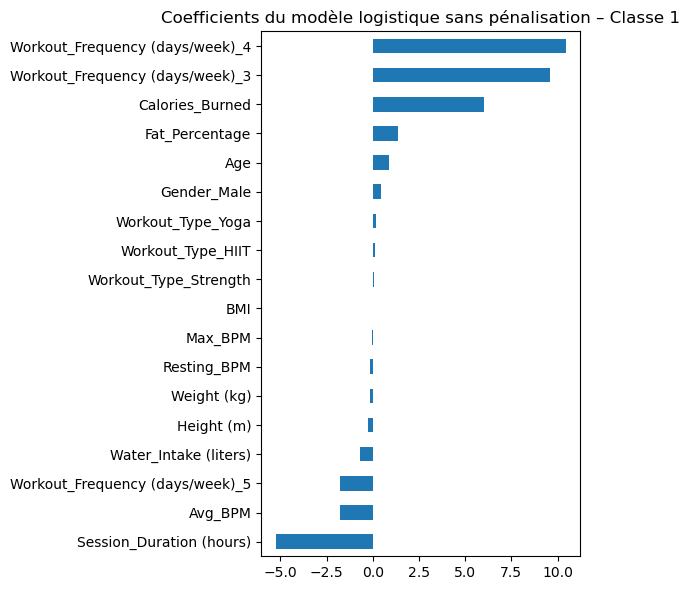

In [229]:
classe = 1
coef = pd.Series(logitCoef[classe], index=X.columns)
imp_coef = coef.sort_values()

plt.figure(figsize=(6, 6))
imp_coef.plot(kind="barh")
plt.title(f"Coefficients du modèle logistique sans pénalisation – Classe {classe}")
plt.tight_layout()
plt.show()


Les individus classés comme intermédiaires sont fortement caractérisés par une dépense énergétique élevée (Calories_Burned) et une fréquence d’entraînement modérée à élevée (Workout_Frequency_3 et _4). On note également une influence positive du taux de masse grasse (Fat_Percentage) et de l’âge, ce qui peut refléter un public un peu plus expérimenté mais pas encore expert. En revanche, une durée de séance faible ainsi qu’une fréquence de 5 fois/semaine semblent peu compatibles avec ce profil, suggérant qu’ils sont plutôt associés aux experts.

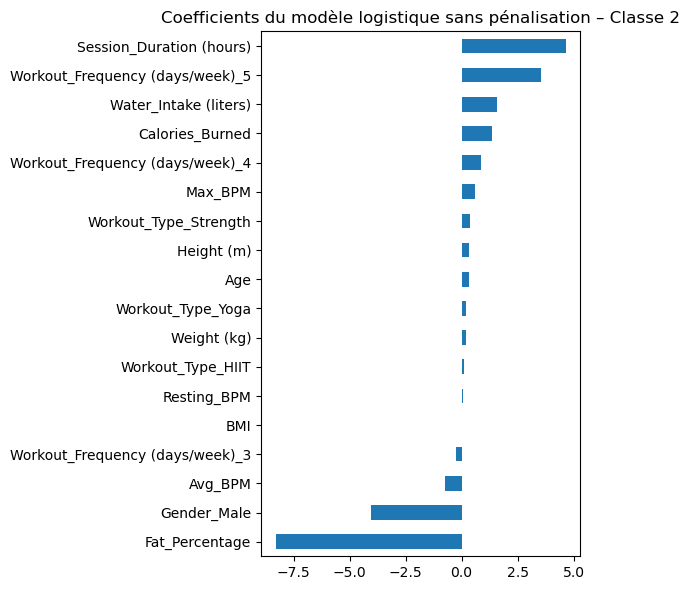

In [232]:
classe = 2
coef = pd.Series(logitCoef[classe], index=X.columns)
imp_coef = coef.sort_values()

plt.figure(figsize=(6, 6))
imp_coef.plot(kind="barh")
plt.title(f"Coefficients du modèle logistique sans pénalisation – Classe {classe}")
plt.tight_layout()
plt.show()


Les experts se distinguent par des séances longues (Session_Duration), une forte dépense énergétique (Calories_Burned), et une hydratation élevée (Water_Intake). On note aussi une association nette avec une faible masse grasse (Fat_Percentage fortement négatif), ce qui est physiologiquement cohérent. La fréquence d'entraînement élevée (Workout_Frequency_5) et l'inclination vers des séances de type force ou yoga renforcent ce profil. En revanche, le fait d’être un homme est ici étonnamment corrélé négativement, ce qui pourrait refléter un biais structurel dans l'échantillon.

On remarque que nos résultats sont cohérent avec les analyses réalisées sur l'ACP dans le notebook R.

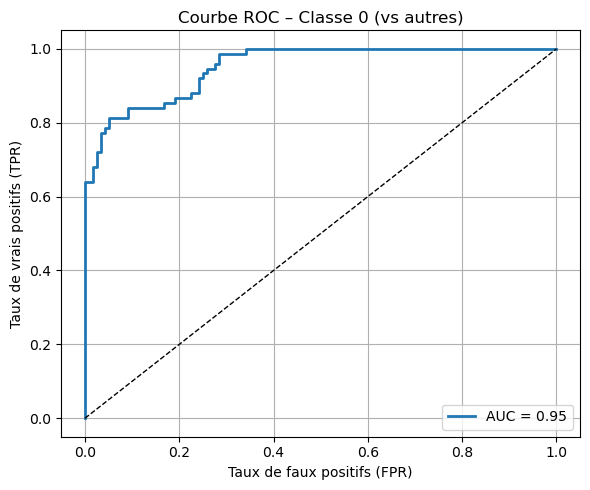

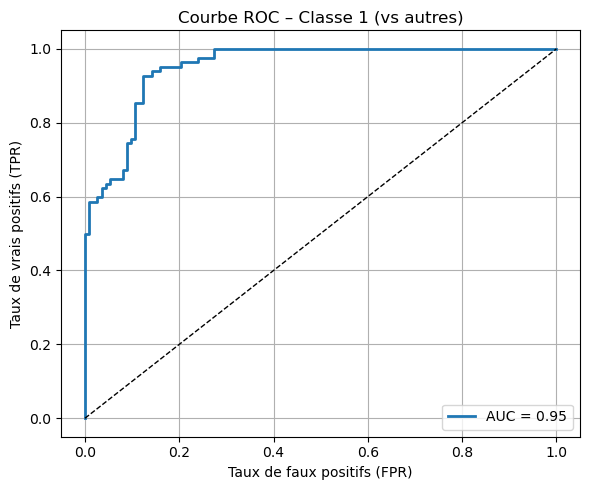

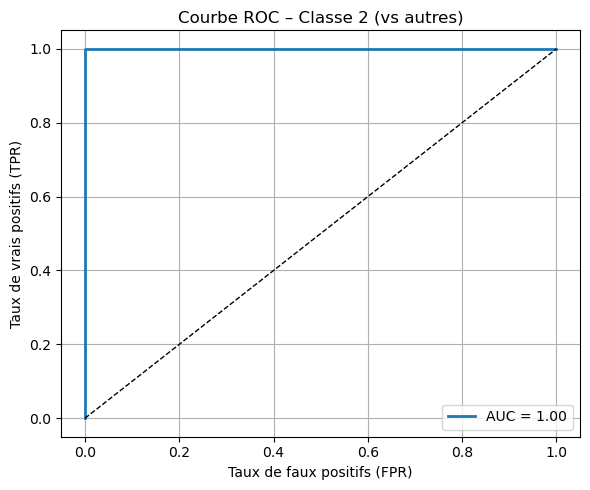

In [234]:
# Binarisation des classes (0, 1, 2) → vecteurs one-hot

y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Prédiction des probabilités sur l'échantillon test
y_score = logitOpt.predict_proba(X_test_scaled)

# Courbe ROC par classe (one-vs-rest)
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)

    # Affichage
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, lw=2, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlabel("Taux de faux positifs (FPR)")
    plt.ylabel("Taux de vrais positifs (TPR)")
    plt.title(f"Courbe ROC – Classe {i} (vs autres)")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Lasso:

In [237]:
# Optimisation du paramètre de pénalisation
# grille de valeurs
param=[{"C":[1,1.2,1.5,1.7,2,3,4]}]
logit_L1 = GridSearchCV(LogisticRegression(penalty="l1",solver="liblinear"), param,cv=5,n_jobs=-1)
logitOpt_L1=logit_L1.fit(X_train_scaled, y_train)  # GridSearchCV est lui-même un estimateur
# paramètre optimal
logitOpt_L1.best_params_["C"]
print("Meilleur score = %f, Meilleur paramètre = %s" % (1.-logitOpt_L1.best_score_,logitOpt_L1.best_params_))

C:\Users\anter\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Meilleur score = 0.137527, Meilleur paramètre = {'C': 1.2}


In [239]:
print("Précision test :", logitOpt_L1.score(X_test_scaled, y_test))
print("Erreur test :", 1 - logitOpt_L1.score(X_test_scaled, y_test))

Précision test : 0.8666666666666667
Erreur test : 0.1333333333333333


In [241]:
y_pred = logitOpt_L1.predict(X_test_scaled)
table = pd.crosstab(y_pred, y_test, rownames=['Prédit'], colnames=['Réel'])
print("Matrice de confusion :")
print(table)

Matrice de confusion :
Réel     0   1   2
Prédit            
0       63  14   0
1       12  68   0
2        0   0  38


Le modèle prédit très bien la classe 2 (expert), mais confond parfois les classes 0 (débutant) et 1 (intermédiaire), notamment 14 débutants pris pour intermédiaires et 12 intermédiaires pris pour débutants.

In [244]:
# Réentraîner le modèle avec le meilleur C
logitLasso = LogisticRegression(
    penalty="l1",
    C=logitOpt_L1.best_params_['C'],
    solver="liblinear",
    multi_class='ovr',
    max_iter=1000
)

logitLasso.fit(X_train_scaled, y_train)

# Coefficients : un vecteur par classe (car classification multiclasse)
logitCoef = logitLasso.coef_

# Affichage des coefficients pour chaque classe
for i, coef in enumerate(logitCoef):
    print(f"Coefficients pour la classe {i} :")
    print(coef)

Coefficients pour la classe 0 :
[-0.07912073  0.07028884  0.30927767  0.          0.26898055  0.00815341
 -0.42361018 -1.11004953  0.146315    0.01011103  0.         -0.15843547
  0.01429069 -0.0813093  -0.1480266  -2.59193947 -5.04813972 -2.43396514]
Coefficients pour la classe 1 :
[ 0.6049706  -0.13221648 -0.2361271  -0.02880261 -1.14524315 -0.13055927
 -3.50044193  4.10833475  1.35043095 -0.6758214   0.          0.67489923
  0.0804518   0.02896945  0.13120241  2.57040349  3.5477734   0.        ]
Coefficients pour la classe 2 :
[ 0.          0.          0.          0.          0.          0.
  2.65425226  0.         -4.65461843  0.13884782  0.         -1.39939318
  0.          0.          0.         -0.22114746  0.17849282  0.59803683]


C:\Users\anter\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [246]:
feature_names = X.columns  # après get_dummies()
for i, coef in enumerate(logitCoef):
    print(f"\nClasse {i} :")
    for name, val in zip(feature_names, coef):
        if val != 0:
            print(f"  {name:30s} -> {val:+.3f}")


Classe 0 :
  Age                            -> -0.079
  Weight (kg)                    -> +0.070
  Height (m)                     -> +0.309
  Avg_BPM                        -> +0.269
  Resting_BPM                    -> +0.008
  Session_Duration (hours)       -> -0.424
  Calories_Burned                -> -1.110
  Fat_Percentage                 -> +0.146
  Water_Intake (liters)          -> +0.010
  Gender_Male                    -> -0.158
  Workout_Type_HIIT              -> +0.014
  Workout_Type_Strength          -> -0.081
  Workout_Type_Yoga              -> -0.148
  Workout_Frequency (days/week)_3 -> -2.592
  Workout_Frequency (days/week)_4 -> -5.048
  Workout_Frequency (days/week)_5 -> -2.434

Classe 1 :
  Age                            -> +0.605
  Weight (kg)                    -> -0.132
  Height (m)                     -> -0.236
  Max_BPM                        -> -0.029
  Avg_BPM                        -> -1.145
  Resting_BPM                    -> -0.131
  Session_Duration (hours) 

In [248]:
for i, coef_vect in enumerate(logitLasso.coef_):
    coef = pd.Series(coef_vect, index=X.columns)
    n_non_zero = (coef != 0).sum()
    n_zero = (coef == 0).sum()
    print(f"Classe {i} : Lasso conserve {n_non_zero} variables et en supprime {n_zero}")

Classe 0 : Lasso conserve 16 variables et en supprime 2
Classe 1 : Lasso conserve 16 variables et en supprime 2
Classe 2 : Lasso conserve 7 variables et en supprime 11


In [250]:
for i, coef_vect in enumerate(logitLasso.coef_):
    coef = pd.Series(coef_vect, index=X.columns)
    kept = coef[coef != 0].index.tolist()
    removed = coef[coef == 0].index.tolist()
    
    print(f"\nClasse {i} :")
    print(f"Variables conservées ({len(kept)}): {kept}")
    print(f"Variables supprimées ({len(removed)}): {removed}")


Classe 0 :
Variables conservées (16): ['Age', 'Weight (kg)', 'Height (m)', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage', 'Water_Intake (liters)', 'Gender_Male', 'Workout_Type_HIIT', 'Workout_Type_Strength', 'Workout_Type_Yoga', 'Workout_Frequency (days/week)_3', 'Workout_Frequency (days/week)_4', 'Workout_Frequency (days/week)_5']
Variables supprimées (2): ['Max_BPM', 'BMI']

Classe 1 :
Variables conservées (16): ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage', 'Water_Intake (liters)', 'Gender_Male', 'Workout_Type_HIIT', 'Workout_Type_Strength', 'Workout_Type_Yoga', 'Workout_Frequency (days/week)_3', 'Workout_Frequency (days/week)_4']
Variables supprimées (2): ['BMI', 'Workout_Frequency (days/week)_5']

Classe 2 :
Variables conservées (7): ['Session_Duration (hours)', 'Fat_Percentage', 'Water_Intake (liters)', 'Gender_Male', 'Workout_Frequency (days/we

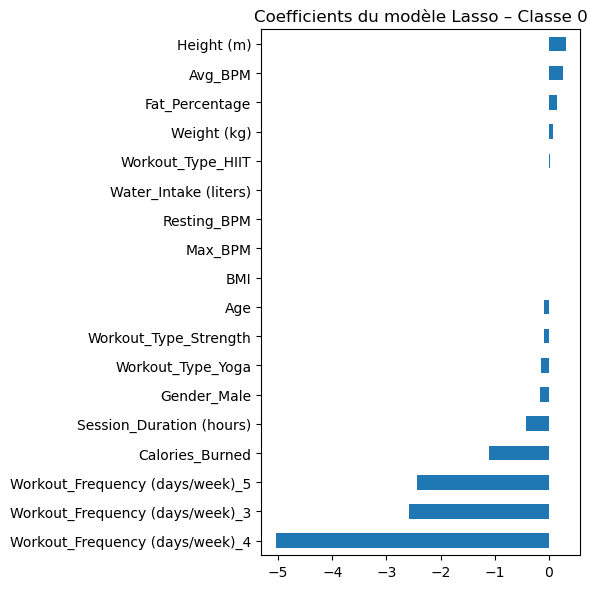

In [252]:
classe = 0  
coef = pd.Series(logitLasso.coef_[classe], index=X.columns)
imp_coef = coef.sort_values()

plt.figure(figsize=(6, 6))
imp_coef.plot(kind="barh")
plt.title(f"Coefficients du modèle Lasso – Classe {classe}")
plt.tight_layout()
plt.show()

Pour la classe des débutants, on voit surtout que ce sont les variables Workout_Frequency qui influencent le plus, elles influencent négativement donc on peut supposer que le modele se base surtout sur les personnes qui ne font pas beaucoup de sport par semaine.

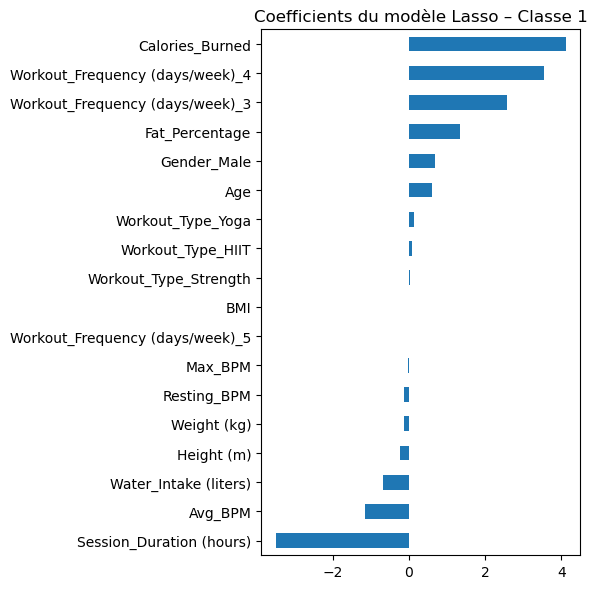

In [255]:
classe = 1  
coef = pd.Series(logitLasso.coef_[classe], index=X.columns)
imp_coef = coef.sort_values()

plt.figure(figsize=(6, 6))
imp_coef.plot(kind="barh")
plt.title(f"Coefficients du modèle Lasso – Classe {classe}")
plt.tight_layout()
plt.show()

Pour la classe des intermédiaires, on voit surtout que ce sont les variables Calories_Burned, Workout_frequency 4 et 3 (positivement) et Session_Duration (négativement) qui influencent le plus,  donc on peut supposer que le modele se base surtout sur les personnes qui s’entraînent souvent mais moins longtemps, et brûlent beaucoup de calories.

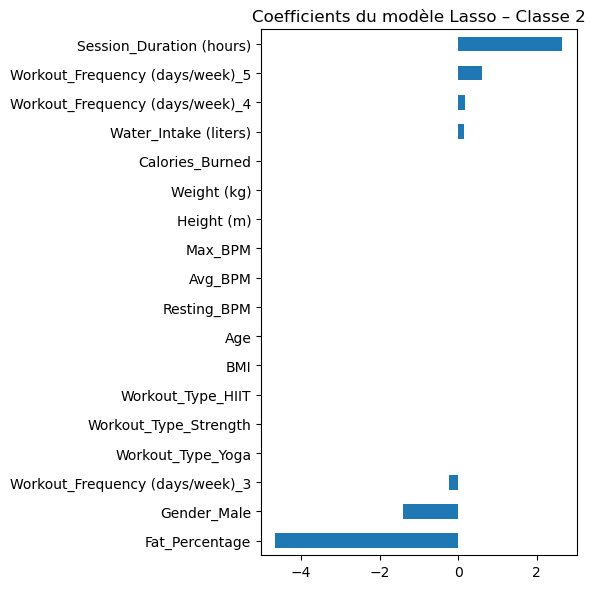

In [258]:
classe = 2  
coef = pd.Series(logitLasso.coef_[classe], index=X.columns)
imp_coef = coef.sort_values()

plt.figure(figsize=(6, 6))
imp_coef.plot(kind="barh")
plt.title(f"Coefficients du modèle Lasso – Classe {classe}")
plt.tight_layout()
plt.show()

Pour la classe des experts, on voit surtout que ce sont les variables Session_Duration (positivement) et Fat_Percentage (négativement) qui influencent le plus, donc on peut supposer que le modele se base surtout sur les personnes qui s’entraînent longtemps et ont un très faible taux de graisse corporel.

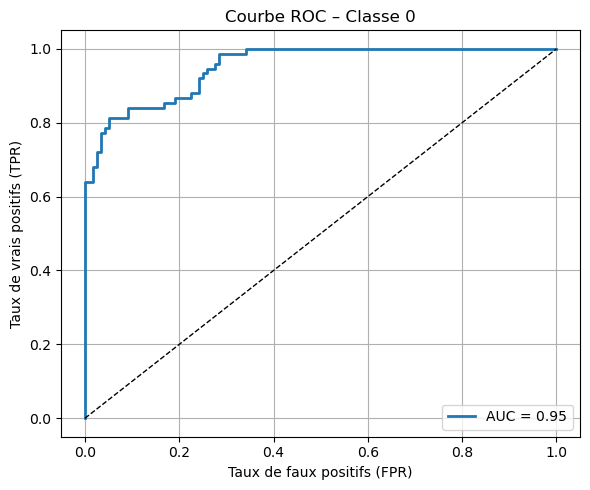

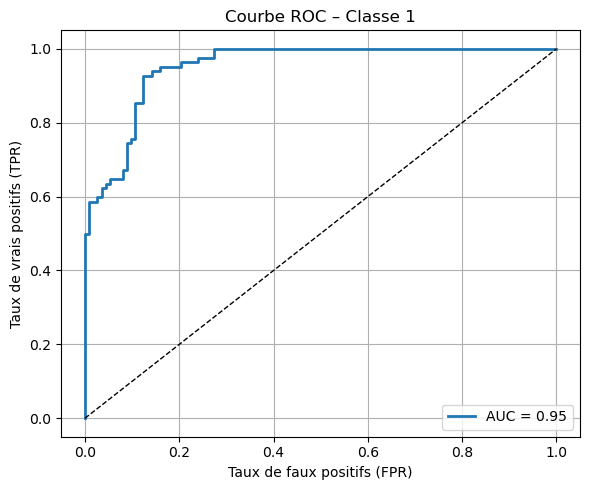

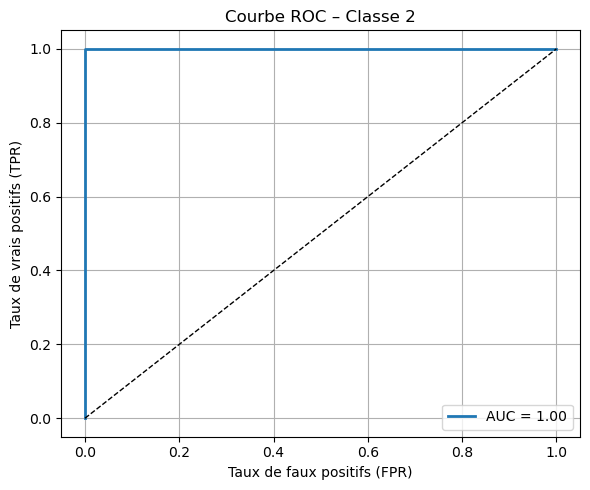

In [261]:
# Binariser la variable cible y_test 
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Prédiction des probabilités avec le modèle logitOpt
y_score = logitOpt.predict_proba(X_test_scaled)

# Affichage d'une courbe ROC pour chaque classe, séparément
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, lw=2, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlabel("Taux de faux positifs (FPR)")
    plt.ylabel("Taux de vrais positifs (TPR)")
    plt.title(f"Courbe ROC – Classe {i}")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Ridge:

In [263]:
# Grille de valeurs pour C (inverse de la régularisation L2)
param = [{"C": [0.1, 0.5, 1, 2, 3, 4, 5]}]

# GridSearchCV avec pénalisation Ridge
logit_L2 = GridSearchCV(
    LogisticRegression(penalty="l2", solver="lbfgs", multi_class='ovr', max_iter=1000),
    param_grid=param,
    cv=5,
    n_jobs=-1
)
logitOpt_L2 = logit_L2.fit(X_train_scaled, y_train)

# Résultats validation croisée + test
print("Meilleur paramètre C :", logitOpt_L2.best_params_['C'])
print("Meilleur score :",1- logitOpt_L2.best_score_)

Meilleur paramètre C : 2
Meilleur score : 0.13881720430107514


C:\Users\anter\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [265]:
print("Précision test :", logitOpt_L2.score(X_test_scaled, y_test))
print("Erreur test :", 1 - logitOpt_L2.score(X_test_scaled, y_test))


Précision test : 0.8769230769230769
Erreur test : 0.12307692307692308


In [267]:
y_pred = logitOpt_L2.predict(X_test_scaled)
table = pd.crosstab(y_pred, y_test, rownames=['Prédit'], colnames=['Réel'])
print("\nMatrice de confusion :")
print(table)


Matrice de confusion :
Réel     0   1   2
Prédit            
0       64  13   0
1       11  69   0
2        0   0  38


In [269]:
# Coefficients par classe
logitCoef = logitOpt_L2.best_estimator_.coef_

for i, coef in enumerate(logitCoef):
    print(f"\nCoefficients pour la classe {i} :")
    print(coef)

# Associer noms des variables
feature_names = X.columns
for i, coef in enumerate(logitCoef):
    print(f"\nClasse {i} :")
    for name, val in zip(feature_names, coef):
        if val != 0:
            print(f"  {name:30s} -> {val:+.3f}")



Coefficients pour la classe 0 :
[-0.08581841  0.05782785  0.35073032 -0.00891265  0.26549808  0.02218425
 -0.52983539 -1.02389968  0.18384832  0.05033983  0.02583296 -0.20753095
  0.01841012 -0.0945499  -0.16053688 -2.21114452 -4.45625299 -2.18038805]

Coefficients pour la classe 1 :
[ 0.48075462 -0.11994001 -0.25506669 -0.03103361 -0.86406685 -0.13256822
 -2.64300175  3.20484554  1.38013915 -0.70475895 -0.01134554  0.85723347
  0.09995036  0.04467513  0.14417781  2.41734159  3.3887237  -0.11618751]

Coefficients pour la classe 2 :
[ 0.1118075  -0.04180993 -0.04376189  0.12324801 -0.52125004  0.04099186
  2.31488767  1.17601919 -3.33874332  0.87799267 -0.02023178 -1.50306026
  0.15251303  0.00487488  0.08465376 -0.46886292  0.73586297  1.05699487]

Classe 0 :
  Age                            -> -0.086
  Weight (kg)                    -> +0.058
  Height (m)                     -> +0.351
  Max_BPM                        -> -0.009
  Avg_BPM                        -> +0.265
  Resting_BPM 

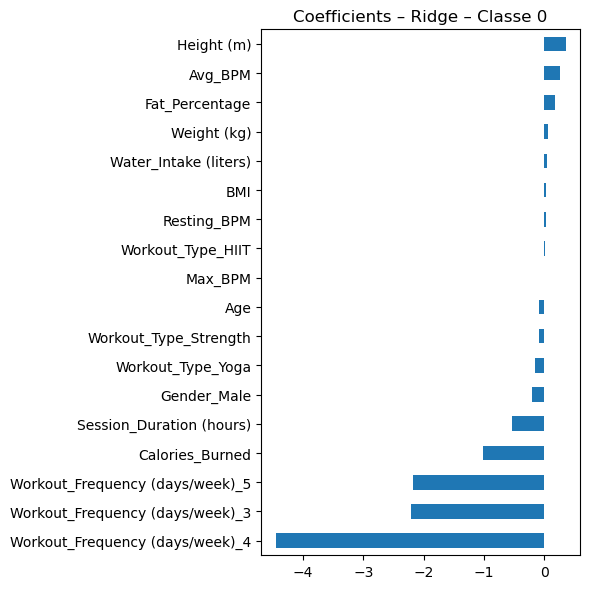

In [271]:
# Visualisation des coefficients pour une classe
classe = 0  # à changer pour 1 ou 2
coef = pd.Series(logitCoef[classe], index=X.columns)
imp_coef = coef.sort_values()

plt.figure(figsize=(6, 6))
imp_coef.plot(kind="barh")
plt.title(f"Coefficients – Ridge – Classe {classe}")
plt.tight_layout()
plt.show()

Le profil des débutants est associé à une faible fréquence d'entraînement (Workout_Frequency_3, _4, _5) et à une durée de séance réduite (Session_Duration). Une faible dépense calorique (Calories_Burned) accentue également leur probabilité d’être classés comme débutants. À l’inverse, certaines variables corporelles comme la taille, le taux de masse grasse, et l’IMC contribuent légèrement à cette classification, mais de manière secondaire. Ce profil reflète une activité physique occasionnelle, peu intense, typique des individus en début de parcours sportif.

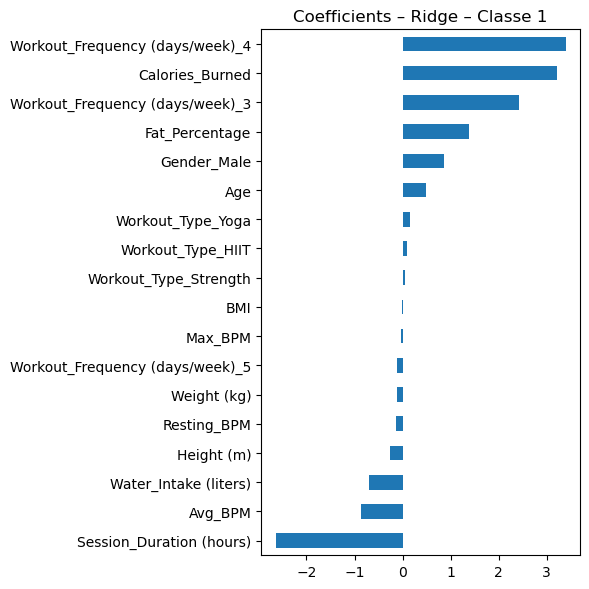

In [274]:
classe = 1
coef = pd.Series(logitCoef[classe], index=X.columns)
imp_coef = coef.sort_values()

plt.figure(figsize=(6, 6))
imp_coef.plot(kind="barh")
plt.title(f"Coefficients – Ridge – Classe {classe}")
plt.tight_layout()
plt.show()

Les intermédiaires se caractérisent par une dépense calorique élevée (Calories_Burned), une fréquence d’entraînement modérée à élevée (Workout_Frequency_3 et _4), et un taux de masse grasse plus important. Le sexe masculin, ainsi que l’âge, favorisent également cette classification. À l’inverse, une longue durée de séance (Session_Duration) et une bonne hydratation (Water_Intake) sont associées négativement à cette classe, ce qui les distingue des profils experts. Ce groupe semble donc correspondre à des individus actifs, mais pas encore au niveau maximal d'engagement ou de condition physique.

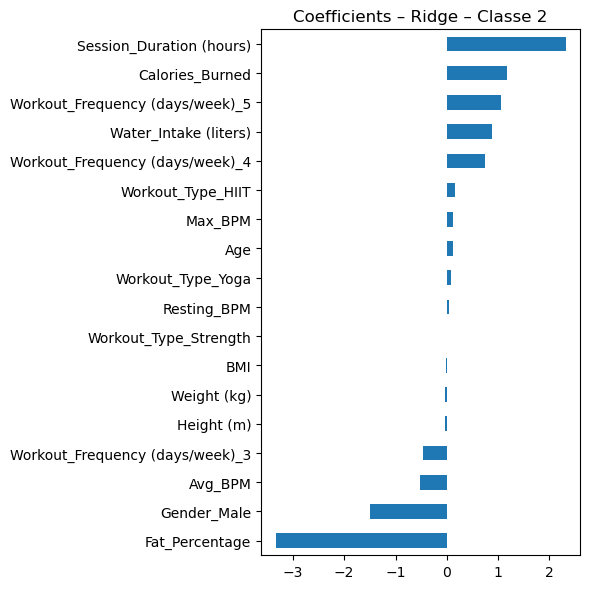

In [277]:
classe = 2
coef = pd.Series(logitCoef[classe], index=X.columns)
imp_coef = coef.sort_values()

plt.figure(figsize=(6, 6))
imp_coef.plot(kind="barh")
plt.title(f"Coefficients – Ridge – Classe {classe}")
plt.tight_layout()
plt.show()

Les experts sont fortement associés à une durée de séance longue (Session_Duration), une grande dépense énergétique (Calories_Burned), une bonne hydratation (Water_Intake) et une fréquence d'entraînement élevée, notamment Workout_Frequency_5. En parallèle, ils présentent un faible taux de masse grasse, et sont moins souvent identifiés comme des hommes (Gender_Male est négatif ici, possiblement un effet de structure de l’échantillon). Ce profil correspond à des individus investis, réguliers et en bonne condition physique, caractéristiques attendues des sportifs expérimentés.

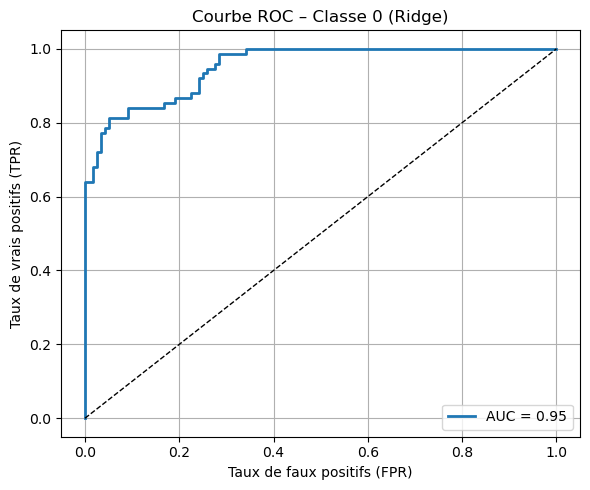

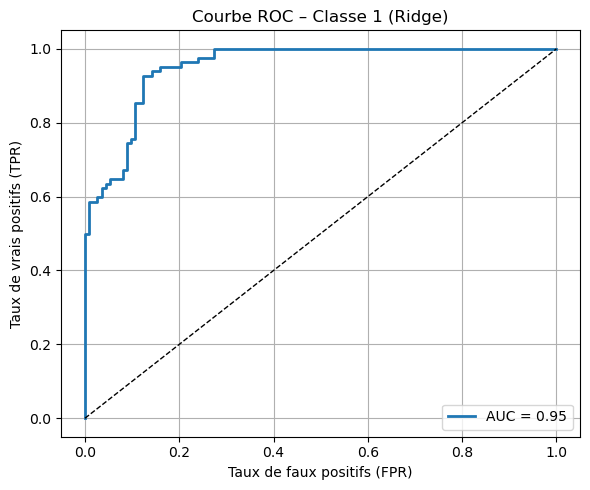

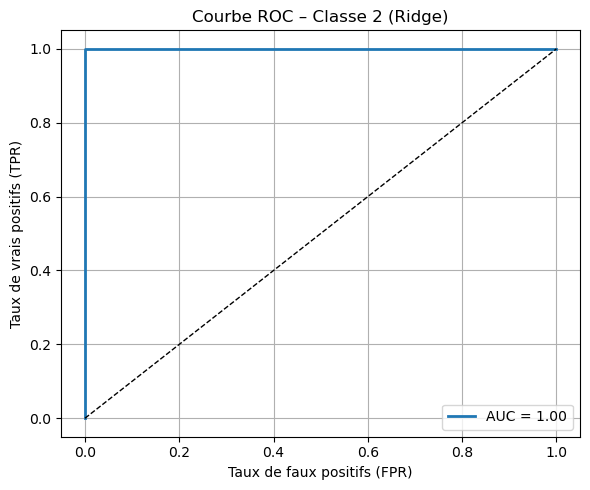

In [279]:
# Courbes ROC par classe
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_score = logitOpt.predict_proba(X_test_scaled)

for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, lw=2, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlabel("Taux de faux positifs (FPR)")
    plt.ylabel("Taux de vrais positifs (TPR)")
    plt.title(f"Courbe ROC – Classe {i} (Ridge)")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Elastic net:

In [282]:
# Grille de recherche pour Elastic Net
param_grid = {
    "C": [0.1, 0.3, 0.5, 0.8, 1, 1.5, 1.8, 2, 2.5],
    "l1_ratio": [0.1, 0.3, 0.5, 0.7 ,0.9]
}

logit_EN = GridSearchCV(
    LogisticRegression(penalty="elasticnet", solver="saga", max_iter=1000, multi_class='ovr'),
    param_grid,
    cv=5,
    n_jobs=-1
)

# Entraînement
logitOpt_EN = logit_EN.fit(X_train_scaled, y_train)

# Résultats
print("Meilleur paramètre :", logitOpt_EN.best_params_)
print("Erreur validation CV :", 1 - logitOpt_EN.best_score_)

C:\Users\anter\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Meilleur paramètre : {'C': 1.5, 'l1_ratio': 0.5}
Erreur validation CV : 0.13624483043837876


In [284]:
print("Précision test :", logitOpt_EN.score(X_test_scaled, y_test))
print("Erreur test :", 1 - logitOpt_EN.score(X_test_scaled, y_test))

Précision test : 0.8769230769230769
Erreur test : 0.12307692307692308


In [286]:
# Matrice de confusion
y_pred = logitOpt_EN.predict(X_test_scaled)
table = pd.crosstab(y_pred, y_test, rownames=['Prédit'], colnames=['Réel'])
print("Matrice de confusion :")
print(table)

Matrice de confusion :
Réel     0   1   2
Prédit            
0       64  13   0
1       11  69   0
2        0   0  38


In [288]:
# Réentraîner avec les meilleurs hyperparamètres
logitElastic = LogisticRegression(
    penalty="elasticnet",
    solver="saga",
    C=logitOpt_EN.best_params_["C"],
    l1_ratio=logitOpt_EN.best_params_["l1_ratio"],
    max_iter=1000,
    multi_class='ovr'
)
logitElastic.fit(X_train_scaled, y_train)

# Coefficients
logitCoef = logitElastic.coef_

# Affichage des coefficients par classe
feature_names = X.columns
for i, coef in enumerate(logitCoef):
    print(f"\nClasse {i} :")
    for name, val in zip(feature_names, coef):
        if val != 0:
            print(f"  {name:30s} -> {val:+.3f}")


Classe 0 :
  Age                            -> -0.075
  Weight (kg)                    -> +0.076
  Height (m)                     -> +0.326
  Max_BPM                        -> -0.004
  Avg_BPM                        -> +0.248
  Resting_BPM                    -> +0.016
  Session_Duration (hours)       -> -0.551
  Calories_Burned                -> -0.990
  Fat_Percentage                 -> +0.174
  Water_Intake (liters)          -> +0.034
  Gender_Male                    -> -0.193
  Workout_Type_HIIT              -> +0.018
  Workout_Type_Strength          -> -0.088
  Workout_Type_Yoga              -> -0.154
  Workout_Frequency (days/week)_3 -> -2.260
  Workout_Frequency (days/week)_4 -> -4.594
  Workout_Frequency (days/week)_5 -> -2.219

Classe 1 :
  Age                            -> +0.498
  Weight (kg)                    -> -0.129
  Height (m)                     -> -0.243
  Max_BPM                        -> -0.029
  Avg_BPM                        -> -0.904
  Resting_BPM              

C:\Users\anter\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


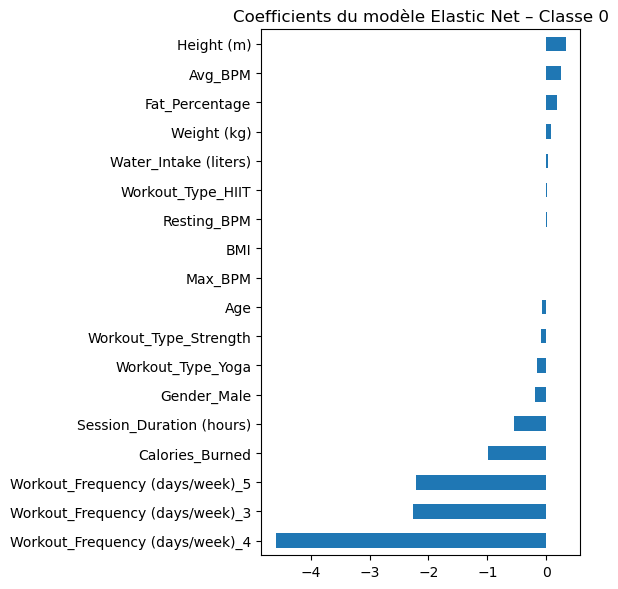

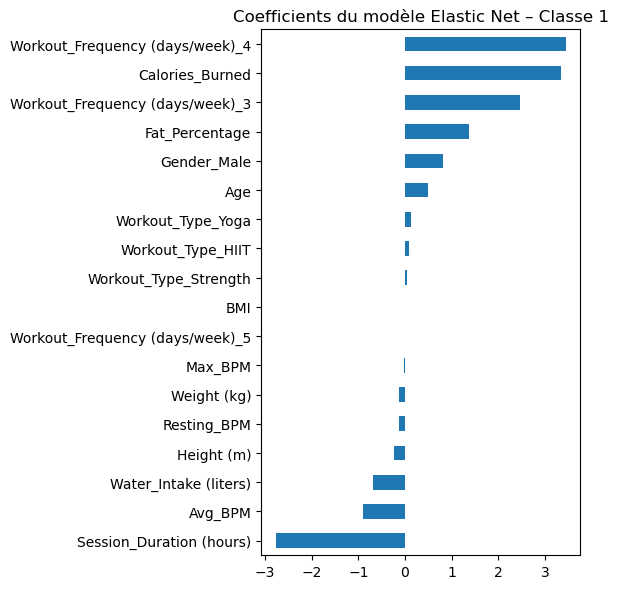

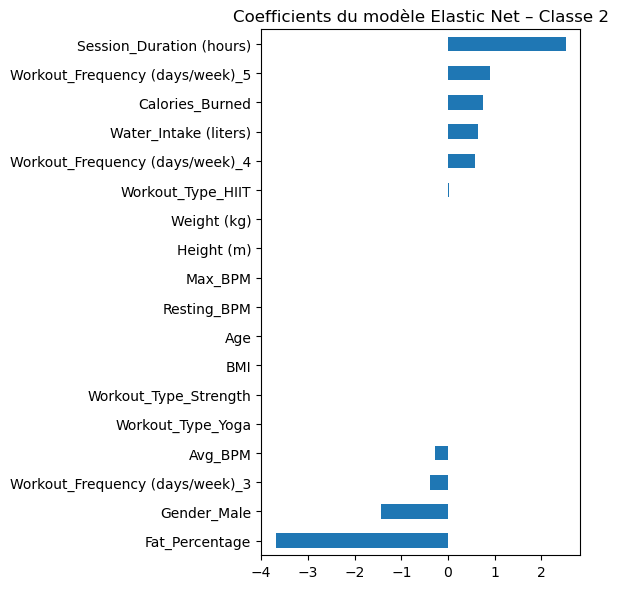

In [290]:
# Affichage des coefficients Elastic Net pour chaque classe
for classe in range(3):
    coef = pd.Series(logitElastic.coef_[classe], index=X.columns)
    imp_coef = coef.sort_values()

    plt.figure(figsize=(6, 6))
    imp_coef.plot(kind="barh")
    plt.title(f"Coefficients du modèle Elastic Net – Classe {classe}")
    plt.tight_layout()
    plt.show()

Les débutants sont associés à une faible fréquence d’entraînement (Workout_Frequency_3, _4, _5) et une durée de séance plus courte. Une faible dépense énergétique (Calories_Burned) renforce cette appartenance, tandis que des variables comme la taille ou le taux de masse grasse ont un effet modérément positif.

Le profil intermédiaire est marqué par une fréquence d’entraînement modérée (Workout_Frequency_3, _4) et une grande dépense calorique. Le sexe masculin, l’âge et le taux de masse grasse favorisent aussi cette classe. En revanche, une longue durée de séance ou une bonne hydratation semblent l’exclure.

Les experts sont définis par une longue durée d’entraînement, une hydratation élevée, une faible masse grasse et une fréquence d’entraînement élevée (Workout_Frequency_4, _5). Le modèle retient peu de variables pour cette classe, indiquant une sélection stricte liée à la régularité et à la condition physique.

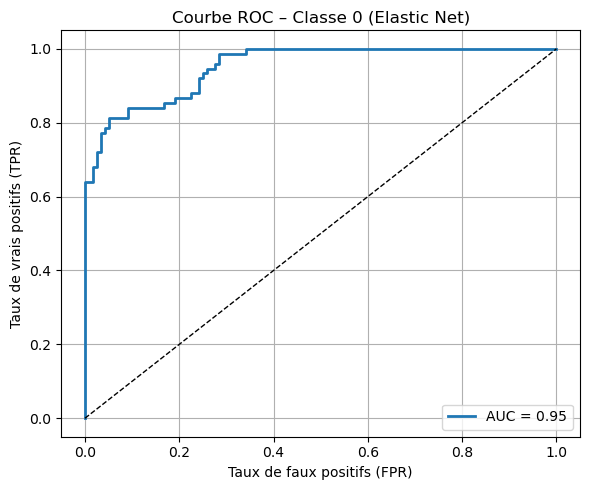

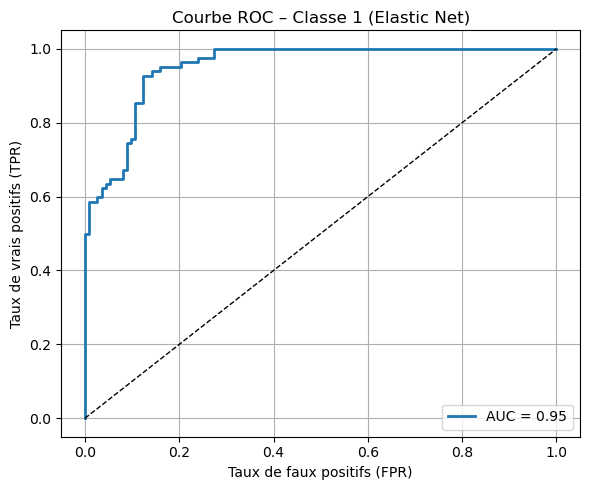

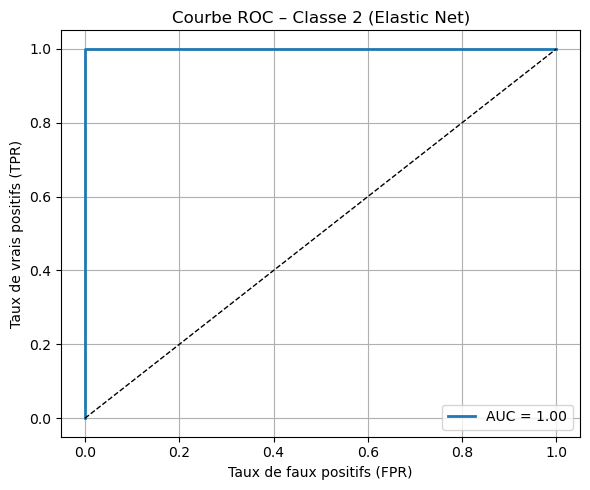

In [295]:
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, lw=2, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlabel("Taux de faux positifs (FPR)")
    plt.ylabel("Taux de vrais positifs (TPR)")
    plt.title(f"Courbe ROC – Classe {i} (Elastic Net)")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Comparaison:

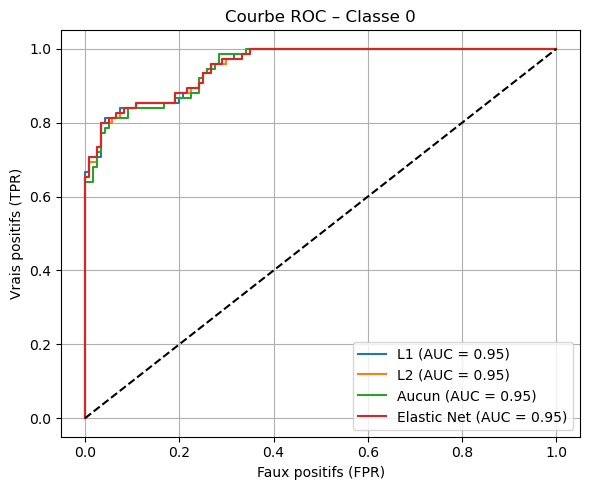

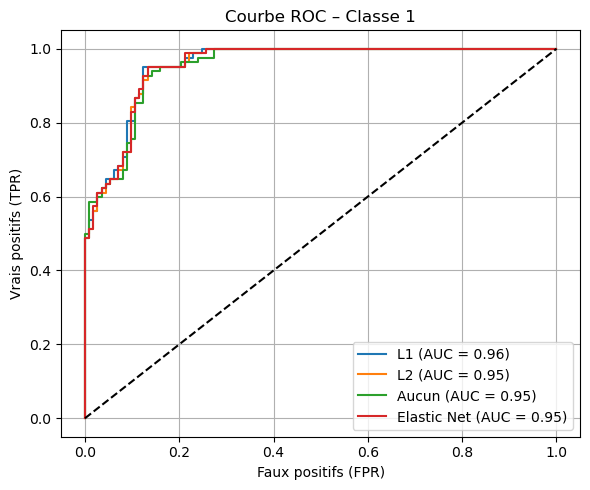

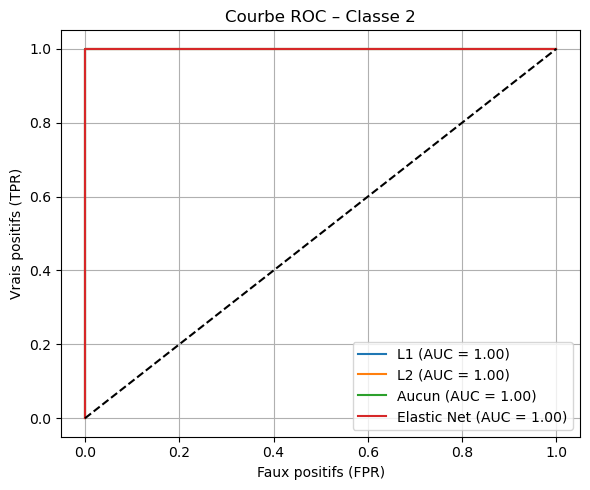

In [297]:
# Binarisation de la variable cible
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Prédictions des probabilités pour chaque modèle
y_score_L1   = logitOpt_L1.predict_proba(X_test_scaled)
y_score_L2   = logitOpt_L2.predict_proba(X_test_scaled)
y_score_none = logitOpt.predict_proba(X_test_scaled)
y_score_EN   = logitOpt_EN.predict_proba(X_test_scaled)

# Tracer les courbes ROC pour chaque classe
for i in range(3):
    fpr_l1, tpr_l1, _ = roc_curve(y_test_bin[:, i], y_score_L1[:, i])
    fpr_l2, tpr_l2, _ = roc_curve(y_test_bin[:, i], y_score_L2[:, i])
    fpr_np, tpr_np, _ = roc_curve(y_test_bin[:, i], y_score_none[:, i])
    fpr_en, tpr_en, _ = roc_curve(y_test_bin[:, i], y_score_EN[:, i])

    auc_l1 = auc(fpr_l1, tpr_l1)
    auc_l2 = auc(fpr_l2, tpr_l2)
    auc_np = auc(fpr_np, tpr_np)
    auc_en = auc(fpr_en, tpr_en)

    # Affichage de la figure
    plt.figure(figsize=(6, 5))
    plt.plot(fpr_l1, tpr_l1, label=f"L1 (AUC = {auc_l1:.2f})")
    plt.plot(fpr_l2, tpr_l2, label=f"L2 (AUC = {auc_l2:.2f})")
    plt.plot(fpr_np, tpr_np, label=f"Aucun (AUC = {auc_np:.2f})")
    plt.plot(fpr_en, tpr_en, label=f"Elastic Net (AUC = {auc_en:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')

    plt.xlabel("Faux positifs (FPR)")
    plt.ylabel("Vrais positifs (TPR)")
    plt.title(f"Courbe ROC – Classe {i}")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

La régression logistique avec une régression Lasso est un tout petit peu meilleure. On peut voir que la classe 2 (Expert) est parfaitement retrouvée et les autres classes sont très bien retrouvés. Nous verrons plus tard que ceci est valable pour toutes les autres méthodes. 

## SVC

Nous avons retenu uniquement les noyaux linéaire et gaussien (RBF), car ils couvrent les cas les plus fréquents : respectivement pour des séparations simples et des frontières complexes. Les noyaux polynomiaux ou sigmoïdes sont plus difficiles à régler et n’apportent généralement pas d’amélioration significative face au noyau RBF.

Avec noyau gaussien:

In [302]:
from sklearn.svm import SVC

In [304]:
# Définir la grille d’hyperparamètre (ici C uniquement)
param_grid = {
    'C': [0.1, 0.5, 0.8 ,1, 2, 5, 8],
    'gamma': [0.005,0.01, 0.1, 0.5, 1],
    'kernel': ['rbf']
}

# Initialiser le modèle SVC
svm = GridSearchCV(SVC(kernel='rbf', probability=True), param_grid=param_grid, cv=5, n_jobs=-1)
# Entraînement sur l’échantillon d’apprentissage
svmOpt = svm.fit(X_train_scaled, y_train)

# Affichage du meilleur paramètre et score validation croisée
print("Meilleur score :",1 - svmOpt.best_score_)
print("Meilleurs hyperparamètres :", svmOpt.best_params_)

Meilleur score : 0.11567411083540124
Meilleurs hyperparamètres : {'C': 5, 'gamma': 0.01, 'kernel': 'rbf'}


In [306]:
# Évaluation sur l’échantillon test
print("Précision test :", svmOpt.score(X_test_scaled, y_test))
print("Erreur test :", 1 - svmOpt.score(X_test_scaled, y_test))

Précision test : 0.882051282051282
Erreur test : 0.11794871794871797


In [308]:
# Prédictions sur test
y_pred = svmOpt.predict(X_test_scaled)

# Matrice de confusion
table = pd.crosstab(y_pred, y_test, rownames=['Prédit'], colnames=['Réel'])
print("\nMatrice de confusion :")
print(table)


Matrice de confusion :
Réel     0   1   2
Prédit            
0       61   9   0
1       14  73   0
2        0   0  38


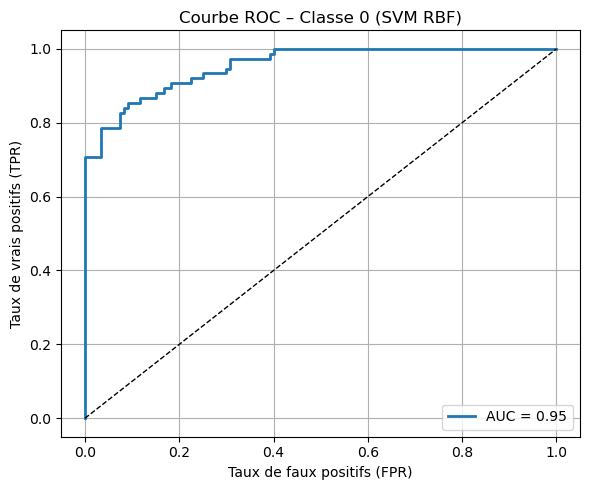

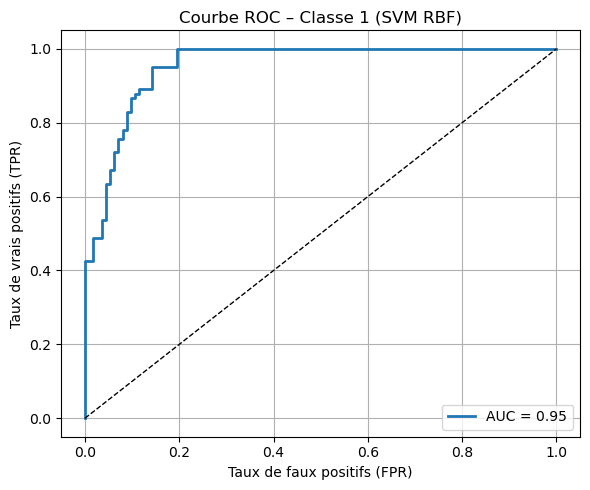

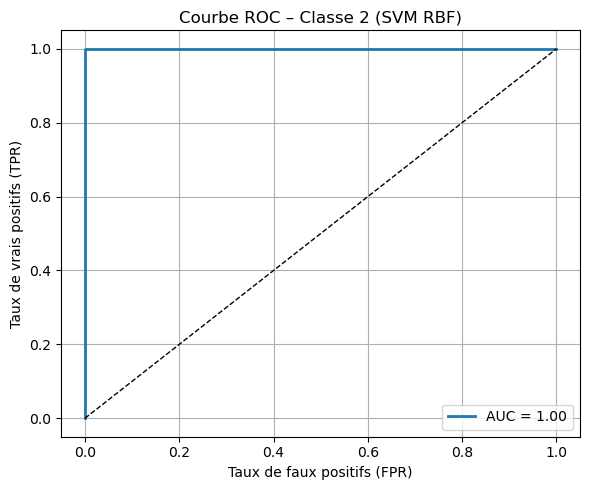

In [310]:
# Binariser y_test
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
# Obtenir les probabilités prédites par le SVM
y_score_svm = svmOpt.predict_proba(X_test_scaled)

# Courbe ROC par classe
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_svm[:, i])
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, lw=2, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], 'k--', lw=1)

    plt.xlabel("Taux de faux positifs (FPR)")
    plt.ylabel("Taux de vrais positifs (TPR)")
    plt.title(f"Courbe ROC – Classe {i} (SVM RBF)")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Avec noyau linéaire:

In [312]:
# Grille d’hyperparamètres : uniquement C ici
param_grid_linear = {
    'C': [0.1,0.3 ,0.5,0.8, 1, 2, 5],
    'kernel': ['linear']
}

# GridSearchCV avec noyau linéaire
svm_linear = GridSearchCV(
    SVC(probability=True),
    param_grid=param_grid_linear,
    cv=5,
    n_jobs=-1
)

# Entraînement
svmOpt_linear = svm_linear.fit(X_train_scaled, y_train)

# Résultats validation croisée + test
print("Meilleur score CV (erreur) :", 1 - svmOpt_linear.best_score_)
print("Meilleur paramètre :", svmOpt_linear.best_params_)


Meilleur score CV (erreur) : 0.12210090984284538
Meilleur paramètre : {'C': 0.5, 'kernel': 'linear'}


In [314]:
# Évaluation sur test
print("Précision test :", svmOpt_linear.score(X_test_scaled, y_test))
print("Erreur test :", 1 - svmOpt_linear.score(X_test_scaled, y_test))

Précision test : 0.882051282051282
Erreur test : 0.11794871794871797


In [316]:
# Matrice de confusion
y_pred_linear = svmOpt_linear.predict(X_test_scaled)
table = pd.crosstab(y_pred_linear, y_test, rownames=['Prédit'], colnames=['Réel'])
print("\nMatrice de confusion (SVM linéaire) :")
print(table)


Matrice de confusion (SVM linéaire) :
Réel     0   1   2
Prédit            
0       61   9   0
1       14  73   0
2        0   0  38


In [320]:
# Extraire le modèle entraîné avec les meilleurs hyperparamètres
svm_final_linear = svmOpt_linear.best_estimator_

# Coefficients du modèle 
coefs = svm_final_linear.coef_

In [324]:
feature_names = X.columns  

# Affichage par classe
for i, coef_vect in enumerate(coefs):
    print(f"\nClasse {i} (vs autres) :")
    sorted_coef = pd.Series(coef_vect, index=feature_names).sort_values(ascending=False)
    print(sorted_coef.head(5))  
    print(sorted_coef.tail(5))  


Classe 0 (vs autres) :
Height (m)        0.295385
Avg_BPM           0.211156
Fat_Percentage    0.055009
Weight (kg)       0.054478
BMI               0.051254
dtype: float64
Gender_Male                       -0.328108
Session_Duration (hours)          -0.592429
Calories_Burned                   -0.687007
Workout_Frequency (days/week)_3   -1.337095
Workout_Frequency (days/week)_4   -2.062424
dtype: float64

Classe 1 (vs autres) :
Fat_Percentage                     0.398211
Gender_Male                        0.166908
Workout_Frequency (days/week)_3    0.039322
Avg_BPM                            0.026920
Workout_Type_Yoga                  0.020591
dtype: float64
Water_Intake (liters)             -0.048101
Calories_Burned                   -0.050552
Session_Duration (hours)          -0.178576
Workout_Frequency (days/week)_5   -0.440109
Workout_Frequency (days/week)_4   -0.710690
dtype: float64

Classe 2 (vs autres) :
Fat_Percentage                     1.425659
Gender_Male                  

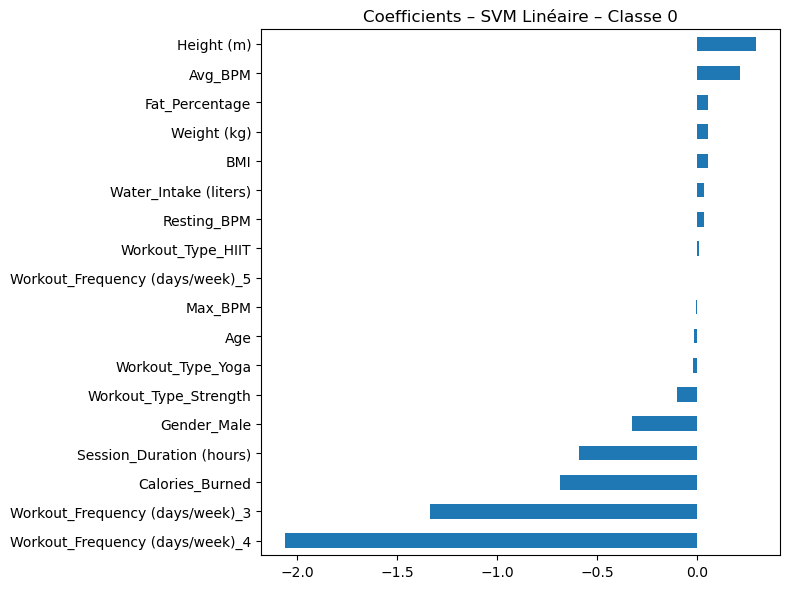

In [326]:
classe = 0 
coef = pd.Series(coefs[classe], index=feature_names)
imp_coef = coef.sort_values()

plt.figure(figsize=(8, 6))
imp_coef.plot(kind="barh")
plt.title(f"Coefficients – SVM Linéaire – Classe {classe}")
plt.tight_layout()
plt.show()

Le SVM linéaire identifie les débutants comme ayant une taille plus élevée, une fréquence cardiaque moyenne plus forte (Avg_BPM), et un taux de masse grasse légèrement supérieur. En revanche, une durée d’entraînement longue, une forte dépense énergétique et une fréquence d’entraînement élevée (Workout_Frequency_3 et _4) réduisent fortement la probabilité d'appartenir à cette classe. Ce profil est cohérent avec des individus physiquement présents mais peu investis ou peu réguliers dans leur pratique.

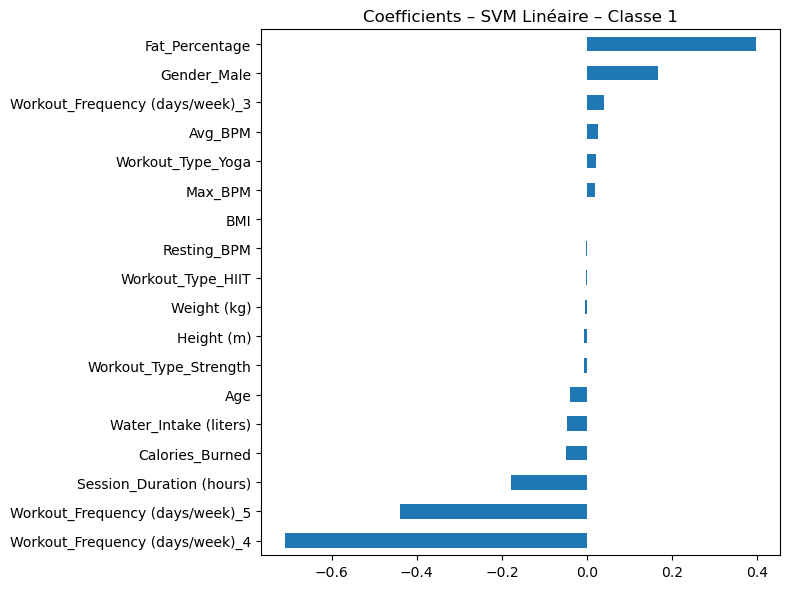

In [329]:
classe = 1 
coef = pd.Series(coefs[classe], index=feature_names)
imp_coef = coef.sort_values()

plt.figure(figsize=(8, 6))
imp_coef.plot(kind="barh")
plt.title(f"Coefficients – SVM Linéaire – Classe {classe}")
plt.tight_layout()
plt.show()

Les intermédiaires se caractérisent par un taux de masse grasse plus élevé et une probabilité accrue chez les hommes. Des entraînements modérés, comme une fréquence de 3 fois/semaine ou la pratique du yoga, sont également positivement associés. En revanche, une forte fréquence (4 ou 5 jours), une longue durée de séance, et une forte dépense calorique tendent à les exclure, ce qui les différencie clairement des experts.

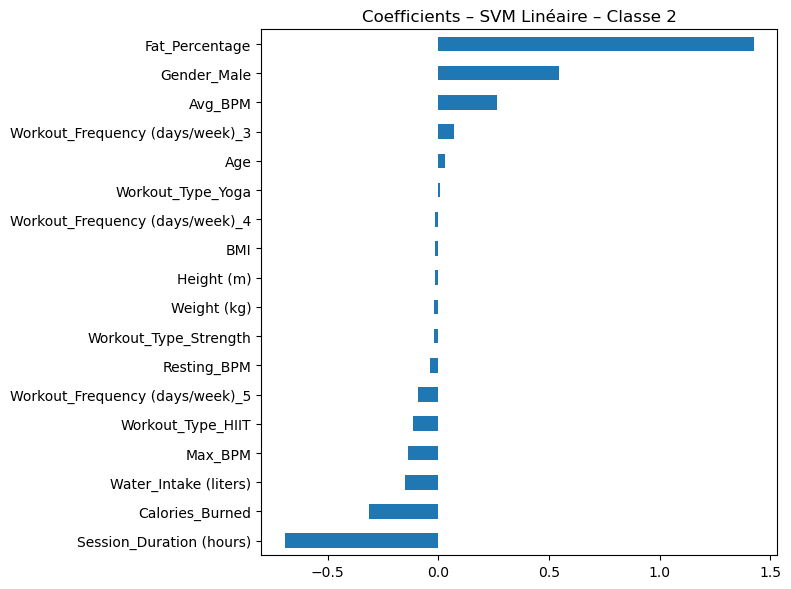

In [332]:
classe = 2
coef = pd.Series(coefs[classe], index=feature_names)
imp_coef = coef.sort_values()

plt.figure(figsize=(8, 6))
imp_coef.plot(kind="barh")
plt.title(f"Coefficients – SVM Linéaire – Classe {classe}")
plt.tight_layout()
plt.show()

Le SVM linéaire identifie les experts par un taux de masse grasse étonnamment élevé, un sexe masculin et une fréquence cardiaque moyenne plus élevée, ainsi qu’une légère influence de l’âge. En revanche, une longue durée de séance, une forte dépense énergétique et une meilleure hydratation réduisent leur probabilité d’être classés comme experts, ce qui contredit les profils obtenus avec d'autres modèles. Cela suggère que le SVM linéaire pourrait avoir du mal à capter correctement les non-linéarités propres à ce groupe.

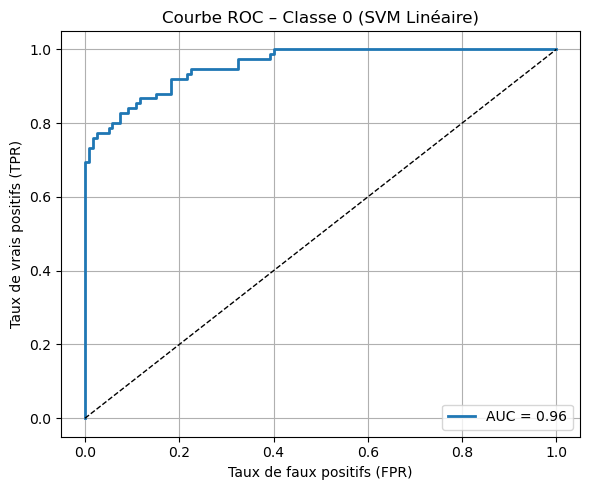

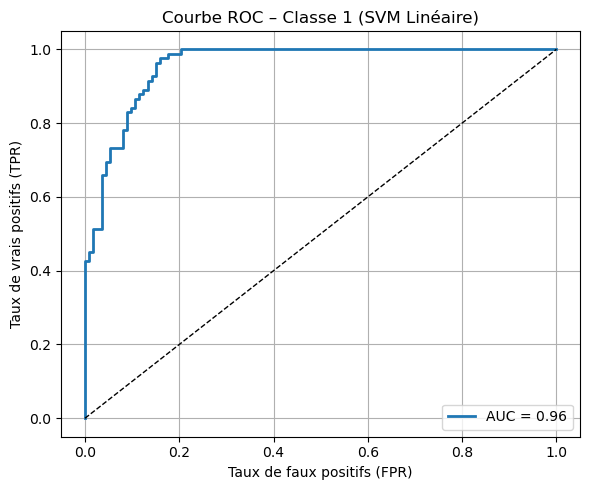

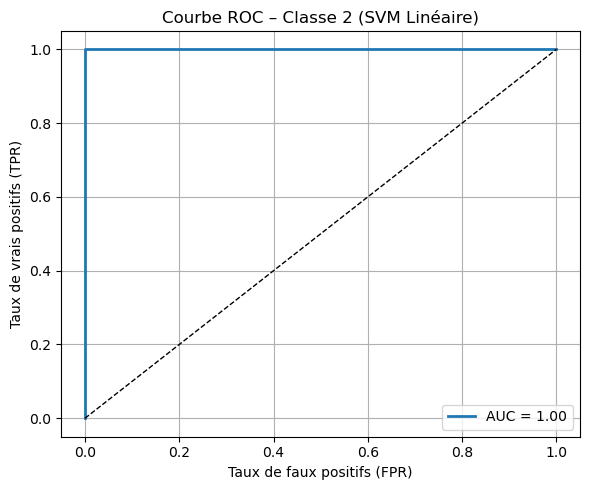

In [335]:
# Obtenir les probabilités prédites par le SVM linéaire
y_score_linear = svmOpt_linear.predict_proba(X_test_scaled)

# Tracer une courbe ROC pour chaque classe
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_linear[:, i])
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, lw=2, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], 'k--', lw=1)

    plt.xlabel("Taux de faux positifs (FPR)")
    plt.ylabel("Taux de vrais positifs (TPR)")
    plt.title(f"Courbe ROC – Classe {i} (SVM Linéaire)")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

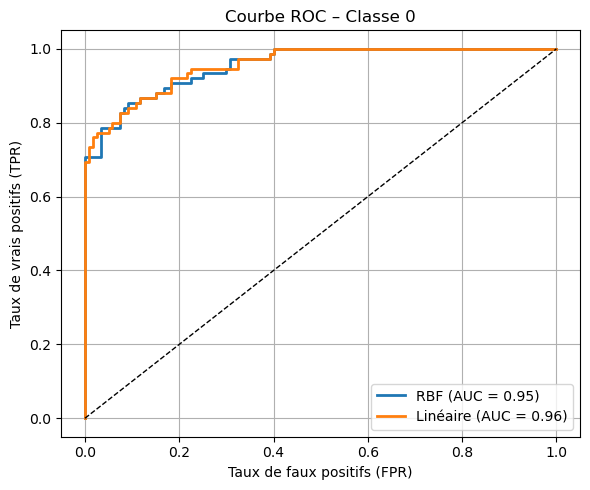

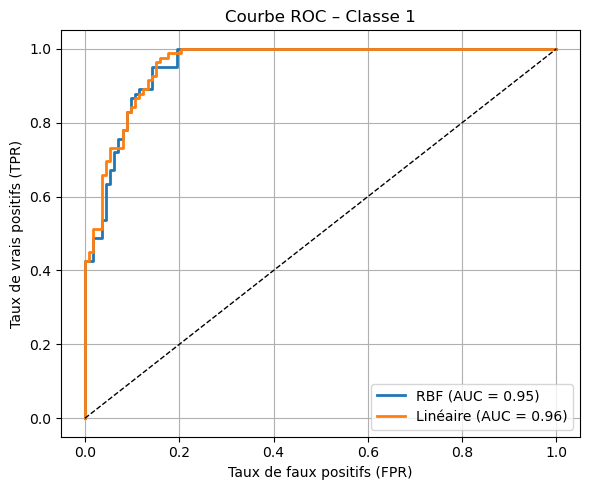

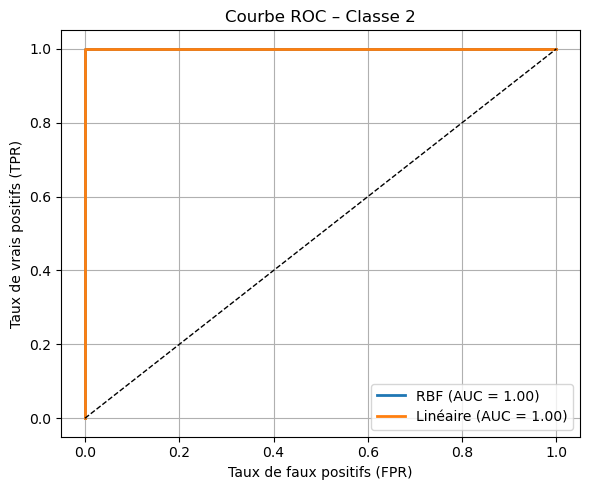

In [337]:
# Probabilités des deux modèles
y_score_rbf = svmOpt.predict_proba(X_test_scaled)           # SVM RBF
y_score_linear = svmOpt_linear.predict_proba(X_test_scaled) # SVM Linéaire

# Tracer une courbe ROC par classe, avec les 2 noyaux
for i in range(y_test_bin.shape[1]):
    # RBF
    fpr_rbf, tpr_rbf, _ = roc_curve(y_test_bin[:, i], y_score_rbf[:, i])
    auc_rbf = auc(fpr_rbf, tpr_rbf)

    # Linéaire
    fpr_lin, tpr_lin, _ = roc_curve(y_test_bin[:, i], y_score_linear[:, i])
    auc_lin = auc(fpr_lin, tpr_lin)

    # Tracé
    plt.figure(figsize=(6, 5))
    plt.plot(fpr_rbf, tpr_rbf, lw=2, label=f"RBF (AUC = {auc_rbf:.2f})")
    plt.plot(fpr_lin, tpr_lin, lw=2, label=f"Linéaire (AUC = {auc_lin:.2f})")
    plt.plot([0, 1], [0, 1], 'k--', lw=1)

    plt.xlabel("Taux de faux positifs (FPR)")
    plt.ylabel("Taux de vrais positifs (TPR)")
    plt.title(f"Courbe ROC – Classe {i}")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Le noyau linéaire est un peu plus performant que le noyau gaussien, cependant on a pu voir certaines variables importantes pour la classification avec ce modèle sont contradictoires avec la classe obtenue. Sachant que le noyau gaussien est quand même pérformant, nous pensons qu'il serait plus judicieux d'utiliser ce modèle, malgré son manque d'interpretabilité.

## Arbre optimal

In [341]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [343]:
# Définir la grille d'hyperparamètres pour la profondeur
param_grid = [{"max_depth": list(range(2, 10))}]

# GridSearchCV avec arbre de décision
tree = GridSearchCV(
    DecisionTreeClassifier(random_state=0),
    param_grid,
    cv=5,
    n_jobs=-1
)

# Entraînement sur l’échantillon d’apprentissage
treeOpt = tree.fit(X_train_scaled, y_train)

# Affichage du meilleur paramètre et score CV
print("Meilleur score CV (erreur) :", 1 - treeOpt.best_score_)
print("Meilleur paramètre :", treeOpt.best_params_)


Meilleur score CV (erreur) : 0.10411083540115806
Meilleur paramètre : {'max_depth': 4}


In [345]:
# Évaluation sur l’échantillon test
print("Précision test :", treeOpt.score(X_test_scaled, y_test))
print("Erreur test :", 1 - treeOpt.score(X_test_scaled, y_test))


Précision test : 0.9230769230769231
Erreur test : 0.07692307692307687


In [347]:
# Prédictions et matrice de confusion
y_chap = treeOpt.predict(X_test_scaled)
table = pd.crosstab(y_chap, y_test, rownames=['Prédit'], colnames=['Réel'])
print("\nMatrice de confusion :")
print(table)


Matrice de confusion :
Réel     0   1   2
Prédit            
0       60   0   0
1       15  82   0
2        0   0  38


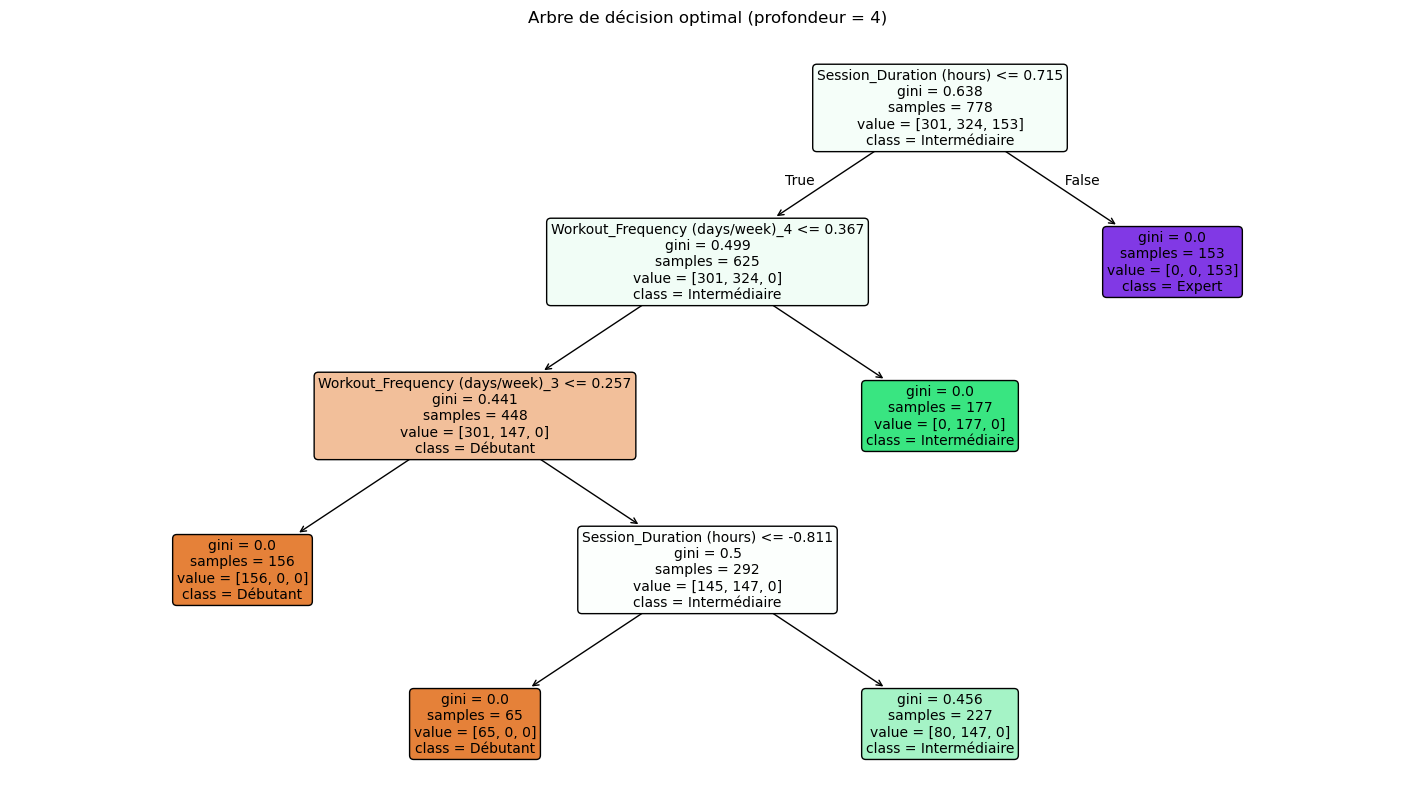

In [349]:
# Visualisation de l’arbre optimal
# On le réentraîne avec le meilleur paramètre trouvé
treeG = DecisionTreeClassifier(max_depth=treeOpt.best_params_['max_depth'], random_state=0)
treeG.fit(X_train_scaled, y_train)

# Noms des variables
feature_names = X.columns

# Tracé
plt.figure(figsize=(18, 10))
plot_tree(treeG, feature_names=feature_names, class_names=['Débutant', 'Intermédiaire', 'Expert'],
          filled=True, rounded=True, fontsize=10)
plt.title("Arbre de décision optimal (profondeur = {})".format(treeOpt.best_params_['max_depth']))
plt.show()

L’arbre de décision identifie deux variables déterminantes : la durée des séances et les fréquences d’entraînement. Il distingue parfaitement les experts (séances longues) et les débutants (fréquence et durée faibles), tandis que les intermédiaires apparaissent dans des cas intermédiaires. Le modèle fournit ainsi des règles simples et interprétables pour prédire le niveau d’expérience.

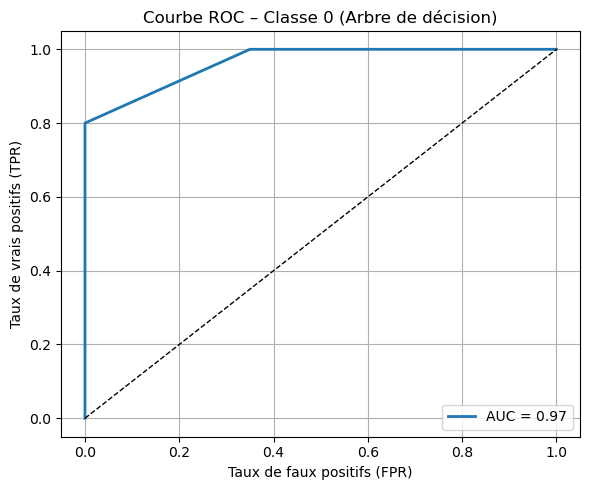

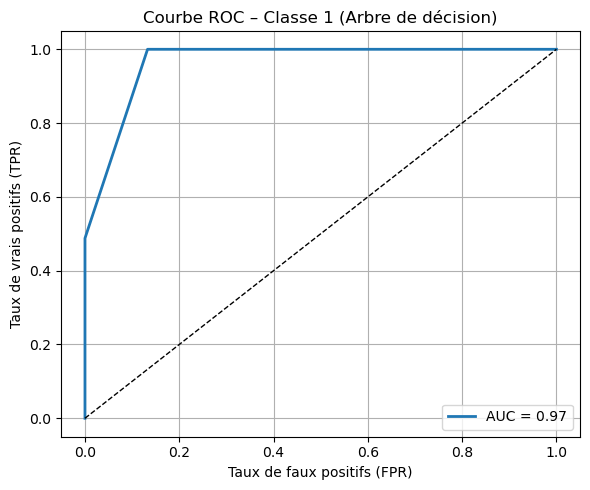

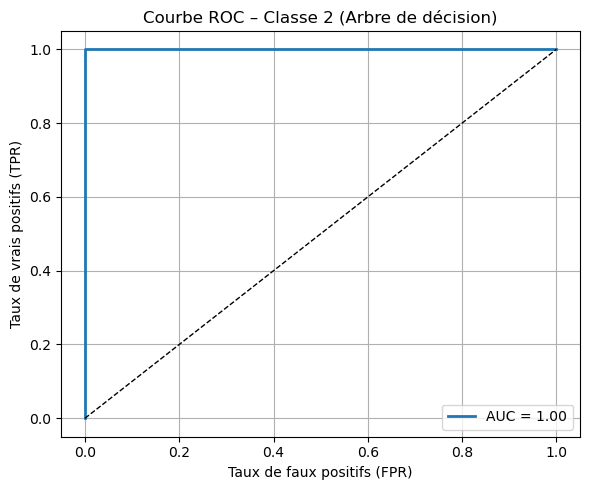

In [352]:
# Binariser y_test 
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Probabilités prédites par l’arbre optimal
y_score_tree = treeOpt.predict_proba(X_test_scaled)

# Tracer les courbes ROC pour chaque classe
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_tree[:, i])
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, lw=2, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlabel("Taux de faux positifs (FPR)")
    plt.ylabel("Taux de vrais positifs (TPR)")
    plt.title(f"Courbe ROC – Classe {i} (Arbre de décision)")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Random Forest 

In [170]:
from sklearn.ensemble import RandomForestClassifier

In [354]:
# Forêt aléatoire initiale avec OOB 
forest = RandomForestClassifier(
    n_estimators=500,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    max_leaf_nodes=None,
    bootstrap=True,
    oob_score=True,
    random_state=0
)

rfFit = forest.fit(X_train_scaled, y_train)

print("Erreur OOB (out-of-bag) :", 1 - rfFit.oob_score_)
print("Précision test :", rfFit.score(X_test_scaled, y_test))
print("Erreur test :", 1 - rfFit.score(X_test_scaled, y_test))

Erreur OOB (out-of-bag) : 0.12210796915167099
Précision test : 0.882051282051282
Erreur test : 0.11794871794871797


-> Erreur OOB correspond à l'erreur de prédiction sur les données non utilisées lors de la construction des arbres.

In [356]:
# Optimisation de max_features
param_grid = [{"max_features": list(range(2, 10))}]
rf = GridSearchCV(
    RandomForestClassifier(n_estimators=100, random_state=0),
    param_grid,
    cv=5,
    n_jobs=-1
)

rfOpt = rf.fit(X_train_scaled, y_train)

print("Meilleur paramètre :", rfOpt.best_params_)
print("Erreur CV :", 1 - rfOpt.best_score_)
print("Erreur test (modèle optimisé) :", 1 - rfOpt.score(X_test_scaled, y_test))


Meilleur paramètre : {'max_features': 7}
Erreur CV : 0.12209263854425134
Erreur test (modèle optimisé) : 0.10769230769230764


In [358]:
# Matrice de confusion
y_chap = rfFit.predict(X_test_scaled)
table = pd.crosstab(y_chap, y_test, rownames=["Prédit"], colnames=["Réel"])
print("\n Matrice de confusion :")
print(table)


 Matrice de confusion :
Réel     0   1   2
Prédit            
0       63  11   0
1       12  71   0
2        0   0  38


In [360]:
# Importance des variables avec la meilleure forêt
rf_final = RandomForestClassifier(
    n_estimators=100,
    max_features=rfOpt.best_params_['max_features'],
    random_state=0
)
rfFit_final = rf_final.fit(X_train_scaled, y_train)

importances = rfFit_final.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

print("\n Importances décroissantes des variables :")
for f in range(X_train_scaled.shape[1]):
    print(f"{feature_names[indices[f]]:<30s} {importances[indices[f]]:.4f}")



 Importances décroissantes des variables :
Session_Duration (hours)       0.2821
Workout_Frequency (days/week)_4 0.1808
Fat_Percentage                 0.1640
Calories_Burned                0.0887
Workout_Frequency (days/week)_3 0.0822
Weight (kg)                    0.0253
Water_Intake (liters)          0.0236
BMI                            0.0226
Max_BPM                        0.0221
Workout_Frequency (days/week)_5 0.0217
Height (m)                     0.0216
Avg_BPM                        0.0204
Age                            0.0189
Resting_BPM                    0.0169
Workout_Type_HIIT              0.0030
Workout_Type_Strength          0.0025
Workout_Type_Yoga              0.0023
Gender_Male                    0.0015


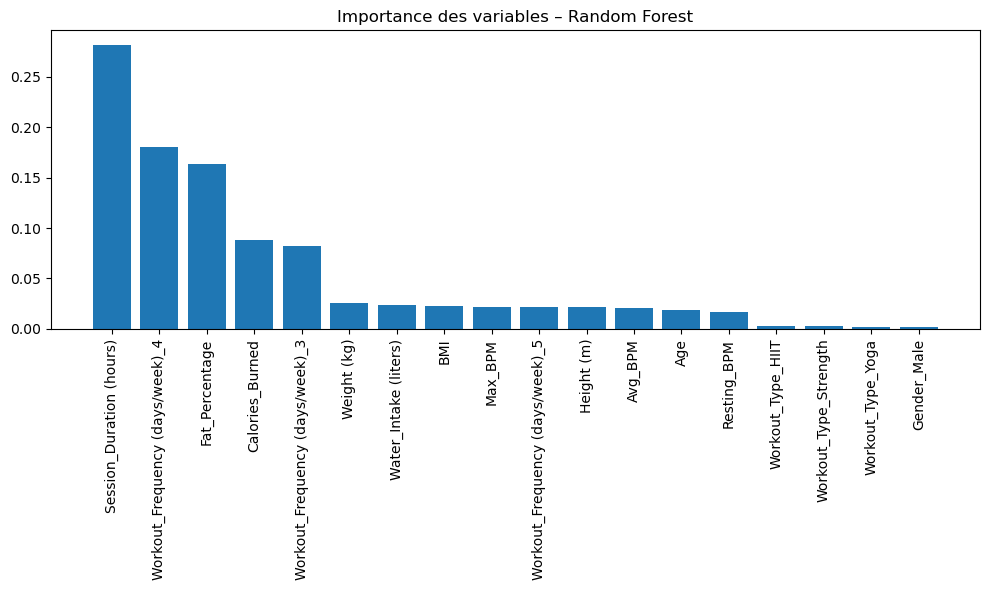

In [362]:
# Graphe des importances
plt.figure(figsize=(10, 6))
plt.title("Importance des variables – Random Forest")
plt.bar(range(X_train_scaled.shape[1]), importances[indices])
plt.xticks(range(X_train_scaled.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

Le modèle Random Forest met en avant la durée des séances, la fréquence d'entraînement (en particulier 4 fois/semaine), ainsi que le taux de masse grasse comme principaux déterminants du niveau d'expérience. À l’inverse, le type d'entraînement suivi et le sexe ont peu d’influence sur la classification selon la forêt aléatoire.

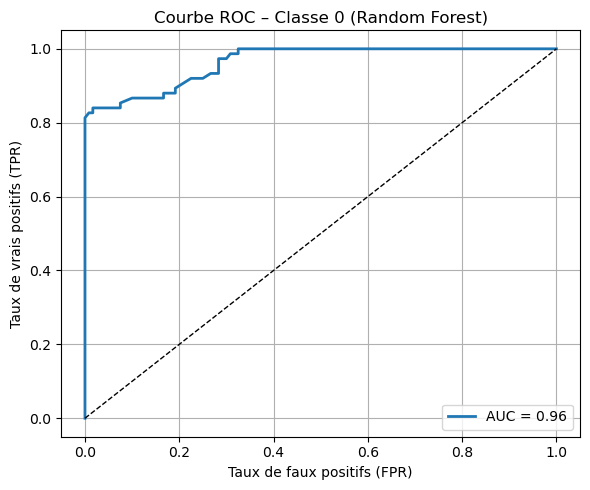

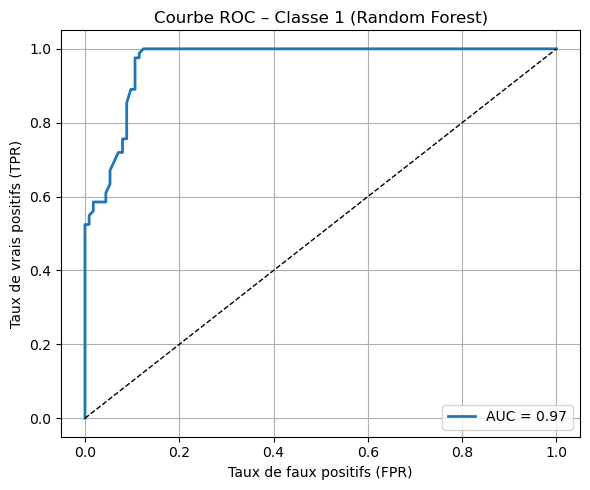

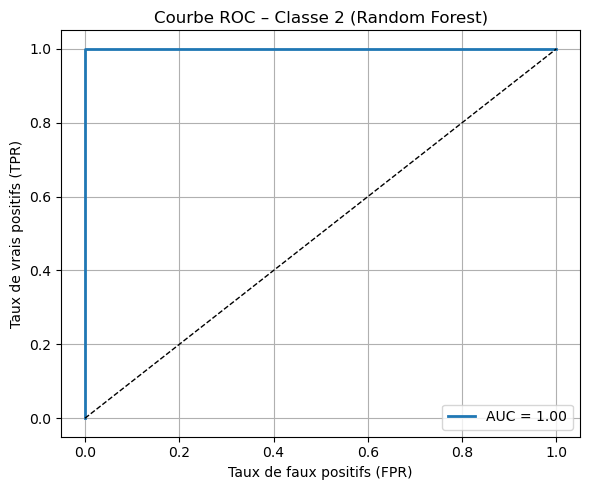

In [364]:
# Binariser la cible (si ce n’est pas déjà fait)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Prédire les probabilités sur le test
y_score_rf = rfFit_final.predict_proba(X_test_scaled)

# Tracer une courbe ROC par classe
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_rf[:, i])
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, lw=2, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlabel("Taux de faux positifs (FPR)")
    plt.ylabel("Taux de vrais positifs (TPR)")
    plt.title(f"Courbe ROC – Classe {i} (Random Forest)")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Boosting

In [367]:
from sklearn.ensemble import GradientBoostingClassifier
import time

In [369]:
# Début chronométrage
tps0 = time.perf_counter()

# Grille de paramètres (nombre d’estimateurs à tester)
param_grid = [{"n_estimators": [200, 250, 300, 350, 400]}]

# GridSearchCV avec validation croisée
gbm = GridSearchCV(
    GradientBoostingClassifier(random_state=0),
    param_grid,
    cv=5,  # 5-fold CV
    n_jobs=-1
)

# Entraînement sur données standardisées
gbmOpt = gbm.fit(X_train_scaled, y_train)

# Fin du chronométrage
tps1 = time.perf_counter() - tps0

# Résultats validation croisée
print("Temps boosting       :", round(tps1, 2), "secondes")
print("Meilleur paramètre   :", gbmOpt.best_params_)
print("Erreur validation CV :", round(1 - gbmOpt.best_score_, 4))


Temps boosting       : 21.75 secondes
Meilleur paramètre   : {'n_estimators': 300}
Erreur validation CV : 0.1183


In [371]:
# Évaluation sur échantillon test
print("Précision test       :", gbmOpt.score(X_test_scaled, y_test))
print("Erreur test          :", 1 - gbmOpt.score(X_test_scaled, y_test))

Précision test       : 0.8871794871794871
Erreur test          : 0.11282051282051286


In [373]:
# Matrice de confusion
y_chap = gbmOpt.predict(X_test_scaled)
table = pd.crosstab(y_chap, y_test, rownames=["Prédit"], colnames=["Réel"])
print("\nMatrice de confusion (Gradient Boosting) :")
print(table)


Matrice de confusion (Gradient Boosting) :
Réel     0   1   2
Prédit            
0       63  10   0
1       12  72   0
2        0   0  38


Importances décroissantes (globales) :
Session_Duration (hours)            0.5757
Workout_Frequency (days/week)_4     0.1684
Fat_Percentage                      0.0959
Workout_Frequency (days/week)_3     0.0698
BMI                                 0.0164
Calories_Burned                     0.0156
Weight (kg)                         0.0114
Water_Intake (liters)               0.0108
Height (m)                          0.0092
Age                                 0.0088
Avg_BPM                             0.0074
Max_BPM                             0.0053
Resting_BPM                         0.0040
Workout_Type_Yoga                   0.0004
Workout_Type_Strength               0.0004
Workout_Type_HIIT                   0.0003
Gender_Male                         0.0002
Workout_Frequency (days/week)_5     0.0001


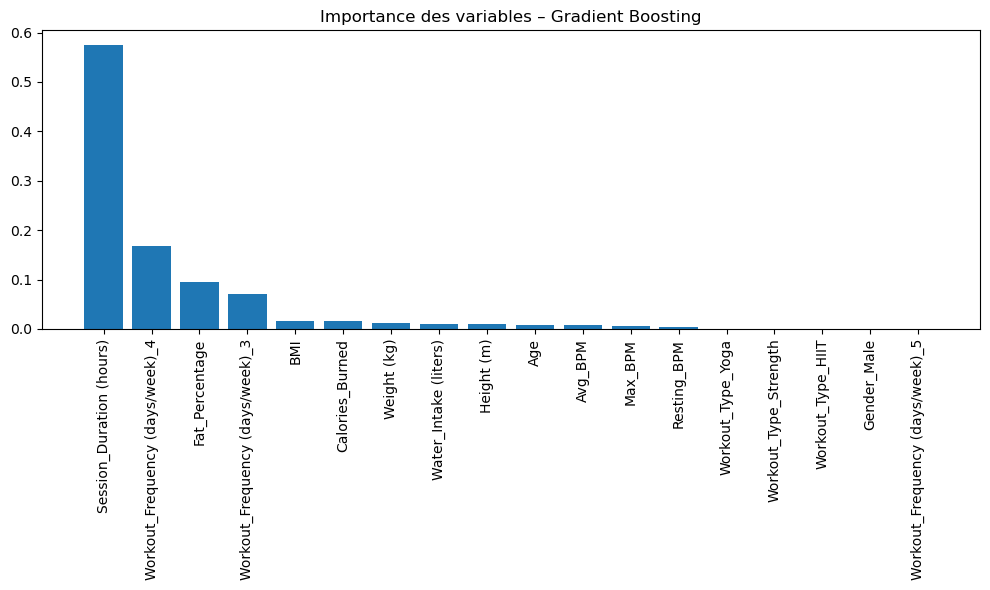

In [375]:
# Récupérer le meilleur modèle
gbm_final = gbmOpt.best_estimator_

# Importances globales
importances = gbm_final.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

# Affichage texte
print("Importances décroissantes (globales) :")
for i in range(len(feature_names)):
    print(f"{feature_names[indices[i]]:<35s} {importances[indices[i]]:.4f}")

# Affichage graphique
plt.figure(figsize=(10, 6))
plt.title("Importance des variables – Gradient Boosting")
plt.bar(range(len(feature_names)), importances[indices])
plt.xticks(range(len(feature_names)), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

Le modèle Gradient Boosting identifie très fortement la durée des séances (Session_Duration) comme la variable la plus déterminante, représentant à elle seule plus de 57% de l’importance totale. Elle est suivie par la fréquence d’entraînement à 4 jours/semaine et le taux de masse grasse. Les autres variables ont une influence marginale, notamment les types d'entraînement et le sexe, qui jouent un rôle quasi nul dans les décisions du modèle. Cela confirme la prédominance des habitudes sportives et des indicateurs corporels dans la prédiction du niveau d’expérience.

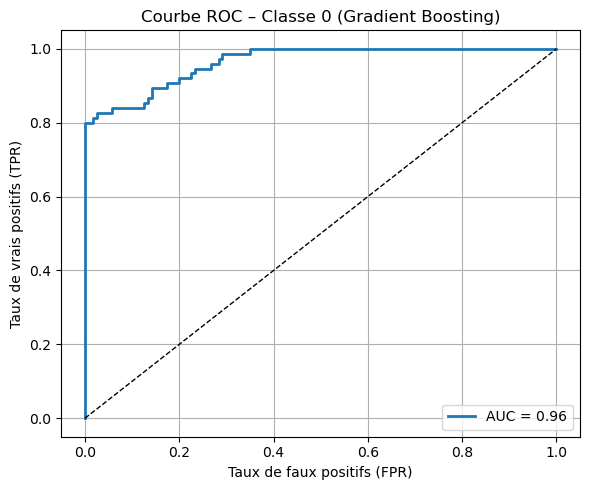

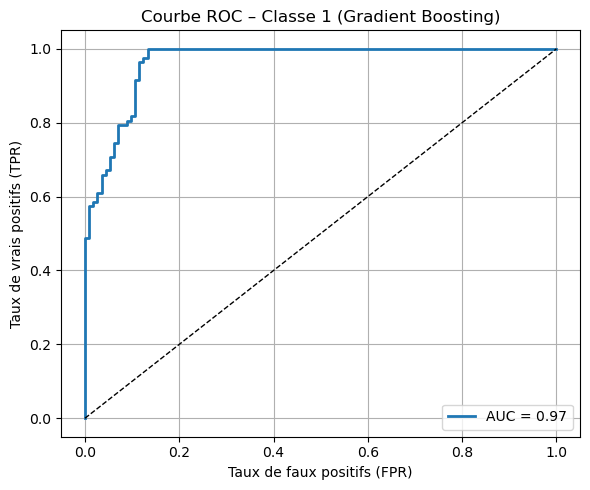

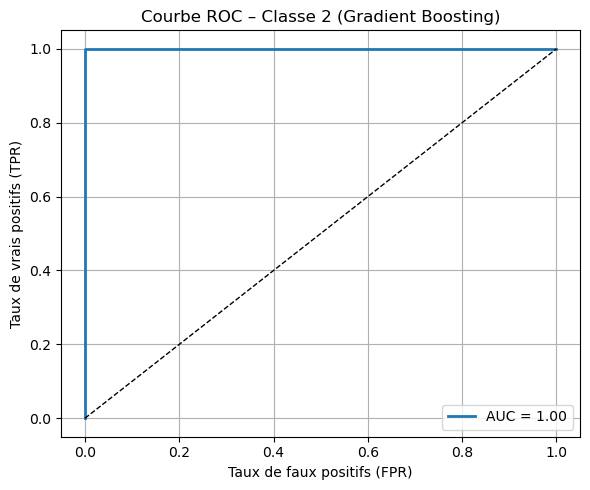

In [378]:
# Binarisation de la variable cible
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Obtenir les probabilités prédites par le modèle Boosting
y_score_gbm = gbmOpt.predict_proba(X_test_scaled)

# Tracer une courbe ROC par classe
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_gbm[:, i])
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, lw=2, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], 'k--', lw=1)

    plt.xlabel("Taux de faux positifs (FPR)")
    plt.ylabel("Taux de vrais positifs (TPR)")
    plt.title(f"Courbe ROC – Classe {i} (Gradient Boosting)")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


## Réseau de neurones 

In [381]:
from sklearn.neural_network import MLPClassifier

In [383]:
# Définir la couche cachée
param_grid = [{
    "hidden_layer_sizes": [(2,), (3,), (4,), (5,), (6,), (7,), (8,), (9,), (10,)]
}]

# GridSearchCV avec validation croisée
nnet = GridSearchCV(
    MLPClassifier(max_iter=500, random_state=0),
    param_grid,
    cv=5,
    n_jobs=-1
)

# Entraînement sur les données standardisées
nnetOpt = nnet.fit(X_train_scaled, y_train)

# Affichage du meilleur score et paramètre
print("Meilleur paramètre :", nnetOpt.best_params_)
print("Erreur validation CV :", 1 - nnetOpt.best_score_)


Meilleur paramètre : {'hidden_layer_sizes': (4,)}
Erreur validation CV : 0.12594706368899922


C:\Users\anter\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [385]:
# Évaluation sur l’échantillon test
print("Précision test :", nnetOpt.score(X_test_scaled, y_test))
print("Erreur test :", 1 - nnetOpt.score(X_test_scaled, y_test))

Précision test : 0.8871794871794871
Erreur test : 0.11282051282051286


In [387]:
# Prédiction et matrice de confusion
y_chap = nnetOpt.predict(X_test_scaled)
table = pd.crosstab(y_chap, y_test, rownames=["Prédit"], colnames=["Réel"])
print("\n Matrice de confusion (Réseau de neurones) :")
print(table)


 Matrice de confusion (Réseau de neurones) :
Réel     0   1   2
Prédit            
0       65  12   0
1       10  70   0
2        0   0  38


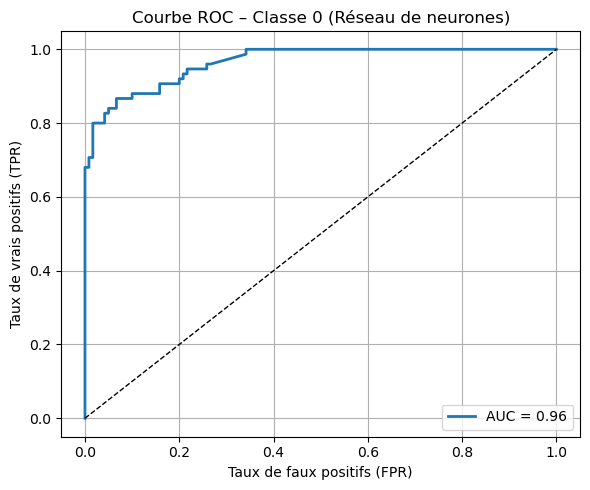

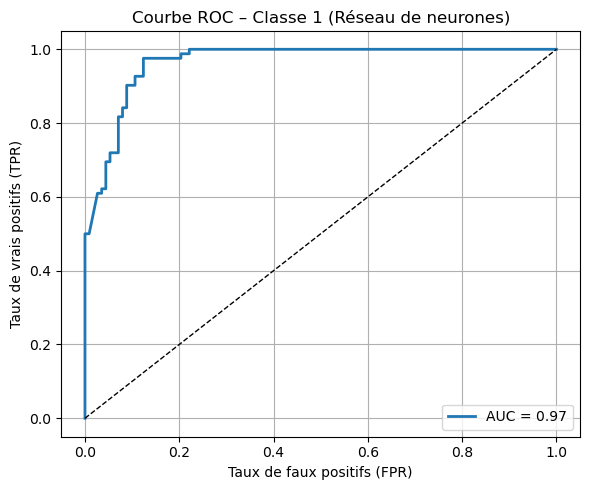

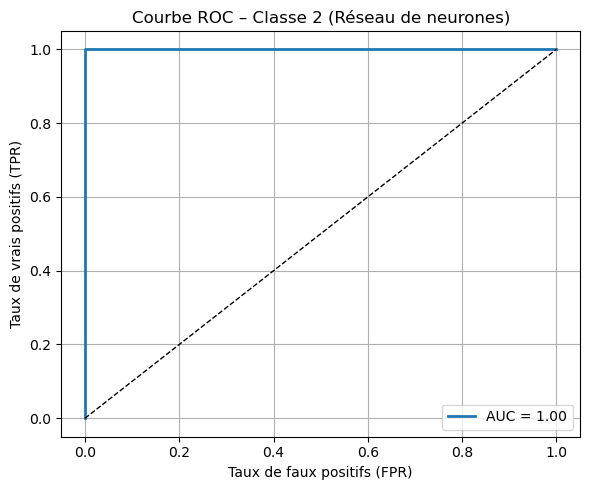

In [389]:
# Binarisation de la cible
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Probabilités prédites par le réseau de neurones
y_score_nnet = nnetOpt.predict_proba(X_test_scaled)

# Courbe ROC pour chaque classe
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_nnet[:, i])
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, lw=2, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlabel("Taux de faux positifs (FPR)")
    plt.ylabel("Taux de vrais positifs (TPR)")
    plt.title(f"Courbe ROC – Classe {i} (Réseau de neurones)")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Comparaison de toutes les méthodes

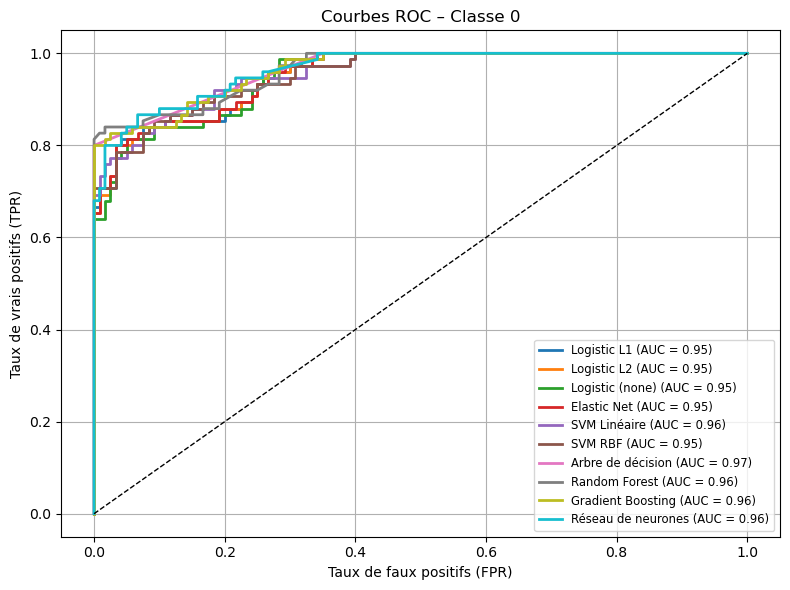

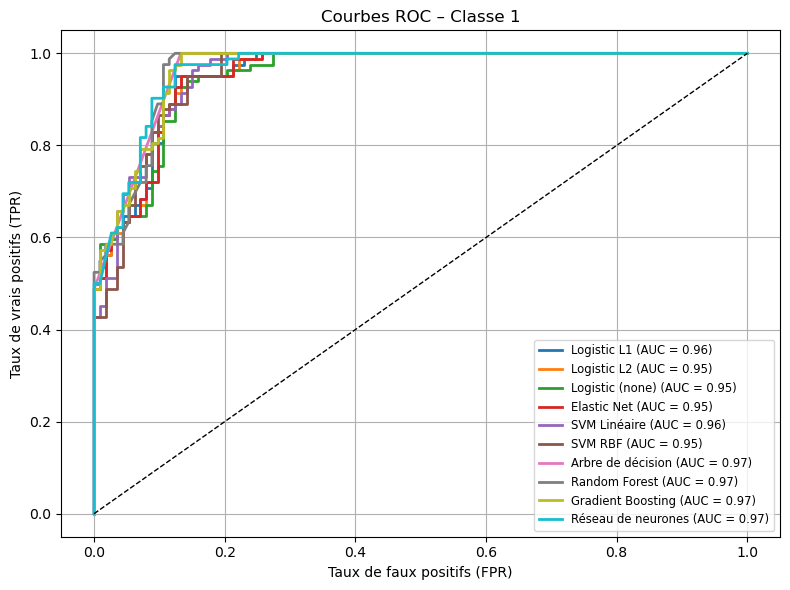

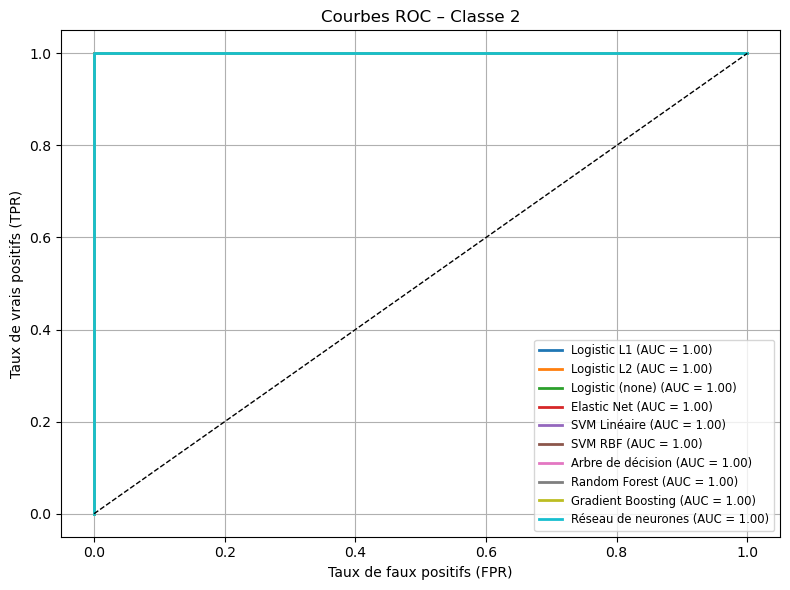

In [392]:
# Ajout des scores Elastic Net
y_score_EN = logitOpt_EN.predict_proba(X_test_scaled)

# Dictionnaire de scores à comparer (avec Elastic Net ajouté)
roc_scores = {
    "Logistic L1": y_score_L1,
    "Logistic L2": y_score_L2,
    "Logistic (none)": y_score_none,
    "Elastic Net": y_score_EN,
    "SVM Linéaire": y_score_linear,
    "SVM RBF": y_score_rbf,
    "Arbre de décision": y_score_tree,
    "Random Forest": y_score_rf,
    "Gradient Boosting": y_score_gbm,
    "Réseau de neurones": y_score_nnet
}

# Affichage des courbes ROC par classe
for i in range(y_test_bin.shape[1]):
    plt.figure(figsize=(8, 6))
    
    for name, scores in roc_scores.items():
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], scores[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.2f})")
    
    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlabel("Taux de faux positifs (FPR)")
    plt.ylabel("Taux de vrais positifs (TPR)")
    plt.title(f"Courbes ROC – Classe {i}")
    plt.legend(loc="lower right", fontsize='small')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Nous pouvons voir que pour la classe expert, toutes les méthodes ont un AUC à 1, ce qui veut dire que toutes les méthodes arrivent à détecter les experts, les sportifs de haut niveau. Pour la classe intermédiaire, on peut voir que les méthodes avec les AUC les plus élevés sont l'arbre de décision, le Random Forest, le Gradient Boosting et le réseau de neurones. Concernant la classe débutant, c'est l'arbre de décision qui a l'AUC le plus élevé.\
De plus, l'Arbre de décision peut être interprété assez facilement. Dans notre cas on peut voir que les variables avec le plus d'influences sont la fréquence et la durée de l'activité sportive.

On remarque que les modèles non linéaires tels que l'arbre de décision, le Random Forest, le Gradient Boosting et le réseau de neurones sont plus performant que les modèles linéaires.

On remarque également que les variables importantes pour la classification de nos modèles sont souvent les mêmes, en effet on retrouve surtout Session_Duration et Workout_Frequency. Ce résultat est cohérent avec ce qu'on a pu voir lors de l'analyse exploratoire des données, notamment lorsqu'on a comparé Session_Duration avec Experience_Level et lorsqu'on a comparé Workout_Frequency avec Experience_Level. On voit aussi que tous les individus appartenant à la classe 3 sont bien classés, ceci est cohérent avec notre analyse descriptive car on a pu voir que la classe 3 se démarque netemment des autres classes. 